## Bibliotecas para uso

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sts
import scikit_posthocs as sp

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [3]:
%matplotlib inline

---

## Carregamento do dataset e informações gerais

In [32]:
# carregando os datasets
df_r = pd.read_csv('winequality-red.csv', sep=';')
df_w = pd.read_csv('winequality-white.csv', sep=';')

### Avaliação do dataset de vinhos vermelhos e filtragem dos dados que participarão da análise

In [33]:
# avaliação geral dos dados do df_r -> 'quality' são dados categóricos ordinais
df_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


**Conclusões:** Não faltam dados em nenhuma das 12 colunas. Das 12 variáveis, somente 'quality' é categórica (ordinal)

In [34]:
# verificação de valores duplicados
display(df_r[df_r.duplicated()])
print(df_r[df_r.duplicated()].shape)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
4               7.4             0.700         0.00            1.90      0.076   
11              7.5             0.500         0.36            6.10      0.071   
27              7.9             0.430         0.21            1.60      0.106   
40              7.3             0.450         0.36            5.90      0.074   
65              7.2             0.725         0.05            4.65      0.086   
...             ...               ...          ...             ...        ...   
1563            7.2             0.695         0.13            2.00      0.076   
1564            7.2             0.695         0.13            2.00      0.076   
1567            7.2             0.695         0.13            2.00      0.076   
1581            6.2             0.560         0.09            1.70      0.053   
1596            6.3             0.510         0.13            2.30      0.076   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
4                    11.0                  34.0  0.99780  3.51       0.56   
11                   17.0                 102.0  0.99780  3.35       0.80   
27                   10.0                  37.0  0.99660  3.17       0.91   
40                   12.0                  87.0  0.99780  3.33       0.83   
65                    4.0                  11.0  0.99620  3.41       0.39   
...                   ...                   ...      ...   ...        ...   
1563                 12.0                  20.0  0.99546  3.29       0.54   
1564                 12.0                  20.0  0.99546  3.29       0.54   
1567                 12.0                  20.0  0.99546  3.29       0.54   
1581                 24.0                  32.0  0.99402  3.54       0.60   
1596                 29.0                  40.0  0.99574  3.42       0.75   

      alcohol  quality  
4         9.4        5  
11       10.5        5  
27        9.5        5  
40       10.5        5  
65       10.9        5  
...       ...      ...  
1563     10.1        5  
1564     10.1        5  
1567     10.1        5  
1581     11.3        5  
1596     11.0        6  

[240 rows x 12 columns]

(240, 12)


**Conclusões:** Existem 240 dados duplicados. As duplicatas serão eliminadas.

In [35]:
# Eliminando as duplicatas, porém mantendo a primeira delas
df_r.drop_duplicates(inplace = True, keep='first')
df_r.shape

(1359, 12)

**Conclusões:** As 240 duplicações foram eliminadas do dataset.

In [37]:
# Medidas resumo para vinho vermelho -> qualidade foi retirado por se tratar de variável categórica
df_r.iloc[:, :11].describe().T

count       mean        std      min      25%      50%  \
fixed acidity         1359.0   8.310596   1.736990  4.60000   7.1000   7.9000   
volatile acidity      1359.0   0.529478   0.183031  0.12000   0.3900   0.5200   
citric acid           1359.0   0.272333   0.195537  0.00000   0.0900   0.2600   
residual sugar        1359.0   2.523400   1.352314  0.90000   1.9000   2.2000   
chlorides             1359.0   0.088124   0.049377  0.01200   0.0700   0.0790   
free sulfur dioxide   1359.0  15.893304  10.447270  1.00000   7.0000  14.0000   
total sulfur dioxide  1359.0  46.825975  33.408946  6.00000  22.0000  38.0000   
density               1359.0   0.996709   0.001869  0.99007   0.9956   0.9967   
pH                    1359.0   3.309787   0.155036  2.74000   3.2100   3.3100   
sulphates             1359.0   0.658705   0.170667  0.33000   0.5500   0.6200   
alcohol               1359.0  10.432315   1.082065  8.40000   9.5000  10.2000   

                           75%        max  
fixed acidity          9.20000   15.90000  
volatile acidity       0.64000    1.58000  
citric acid            0.43000    1.00000  
residual sugar         2.60000   15.50000  
chlorides              0.09100    0.61100  
free sulfur dioxide   21.00000   72.00000  
total sulfur dioxide  63.00000  289.00000  
density                0.99782    1.00369  
pH                     3.40000    4.01000  
sulphates              0.73000    2.00000  
alcohol               11.10000   14.90000

**Conclusões:** Para as features 'residual sugar', 'chlorides', 'free sulfur dioxide' e 'total sulfur dioxide', os valores máximos ficam muito distantes da média e da mediana. Seriam esses pontos atípicos? Deveriam ser retirados da análise ou substituidos por algum valor central? Visualização gráfica pode ajudar a melhorar a interpretação.

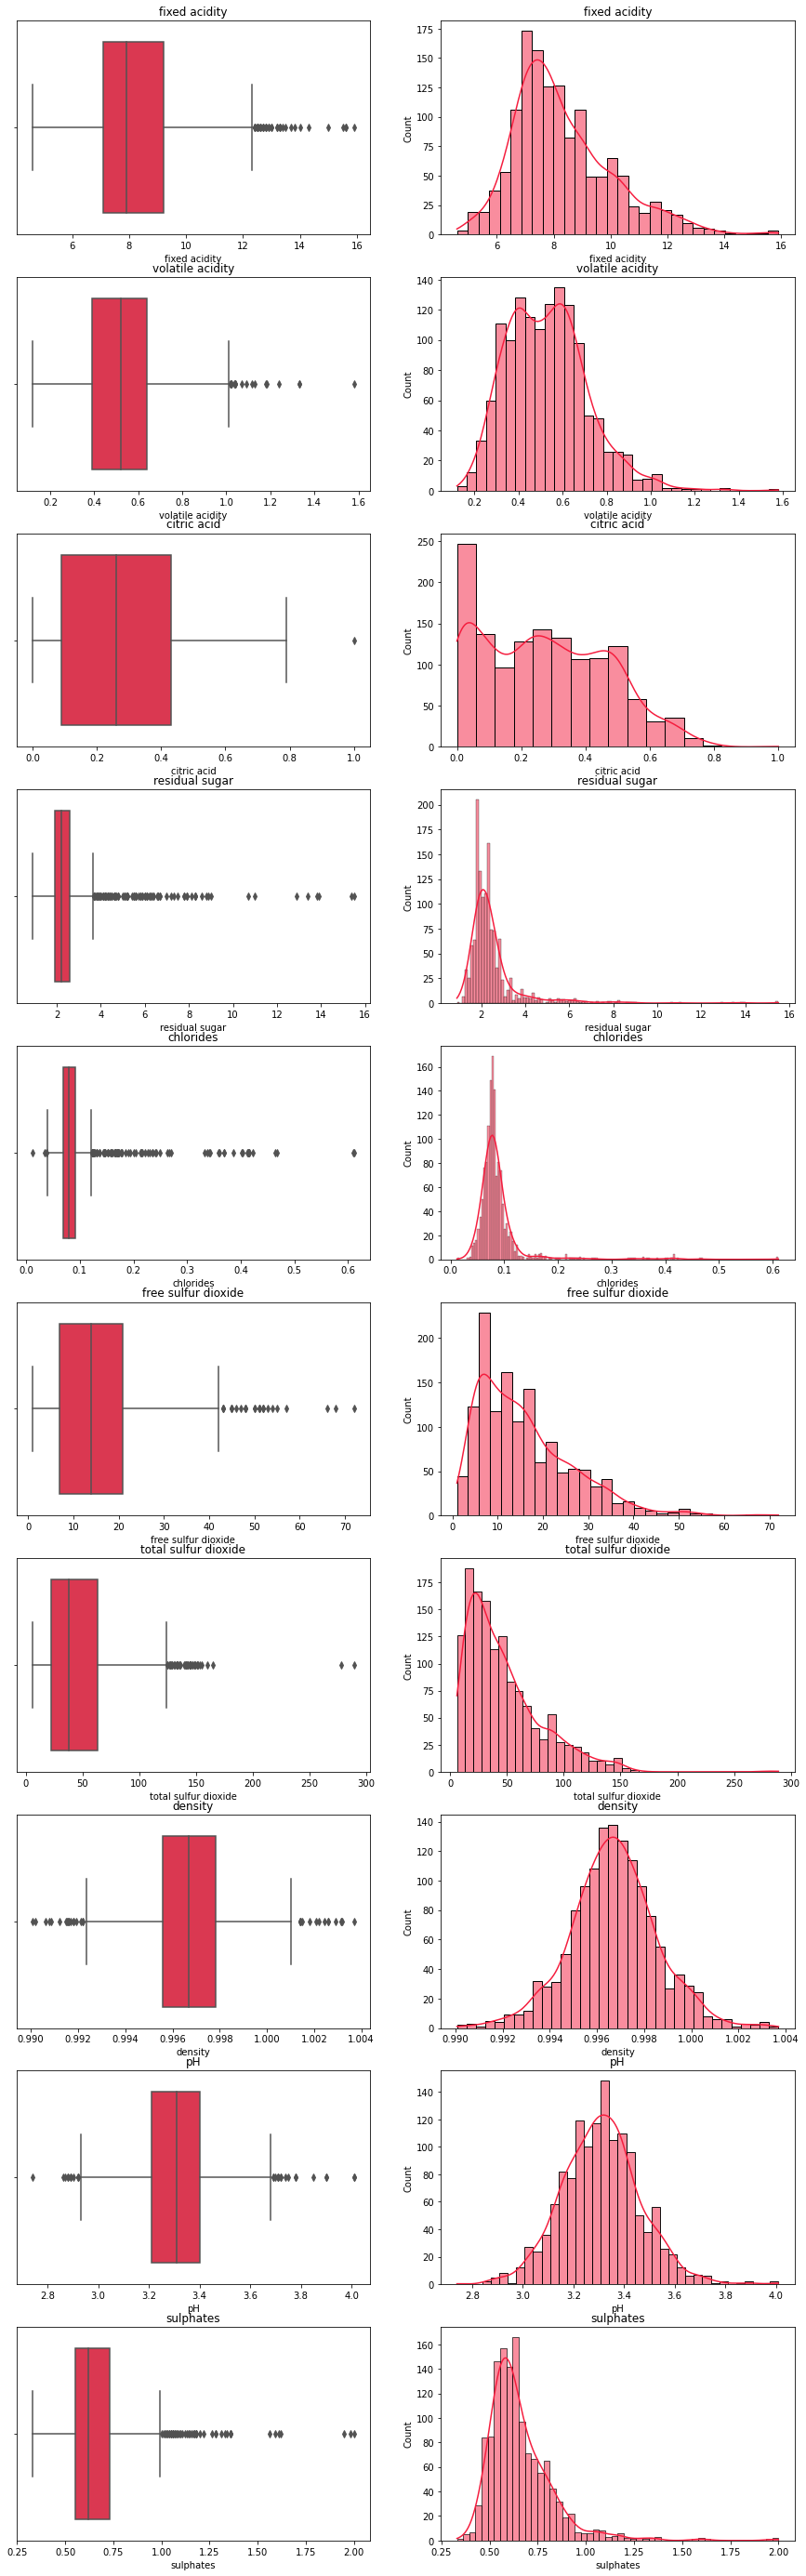

In [38]:
# analisando os dados por boxplot e histograma
var = df_r.columns[:-2].tolist()
plt.figure(figsize=(15,60))

counter = 1

for v in var:
    ax1 = plt.subplot(12, 2, counter)
    ax1.set_title(v)
    sns.boxplot(data = df_r, x = v, color="#f51d3e", ax = ax1)
    counter += 1
    ax2 = plt.subplot(12, 2, counter)
    ax2.set_title(v)
    sns.histplot(data = df_r, x = v, kde = True, color="#f51d3e", ax=ax2)
    counter += 1
    
plt.show()

**Conclusões:** De fato, parece que 'residual sugar', 'chlorides', 'free sulfur dioxide' e 'total sulfur dioxide' possui pontos atípicos. Apesar disso, parecem seguir distribuição normal com assimetria à direita. 'volatile acidity' parece ser bimodal e 'citric acid' não segue distribuição normal. O dataset de vinho vermelho será filtrado de modo a excluir os pontos atípicos das análises.

### Filtragem do dataset de vinhos vermelhos

In [39]:
# filtragem dos pontos atípicos de 'residual sugar', 'chlorides', 'free sulfur dioxide' e 'total sulfur dioxide'.
dfr_clean = df_r.copy() # copia segura para inserir modificações
dfr_clean = dfr_clean[(dfr_clean['residual sugar'] <= (np.quantile(dfr_clean['residual sugar'], 0.95))) &
        (df_r['chlorides'] <= (np.quantile(df_r['chlorides'], 0.95)))]

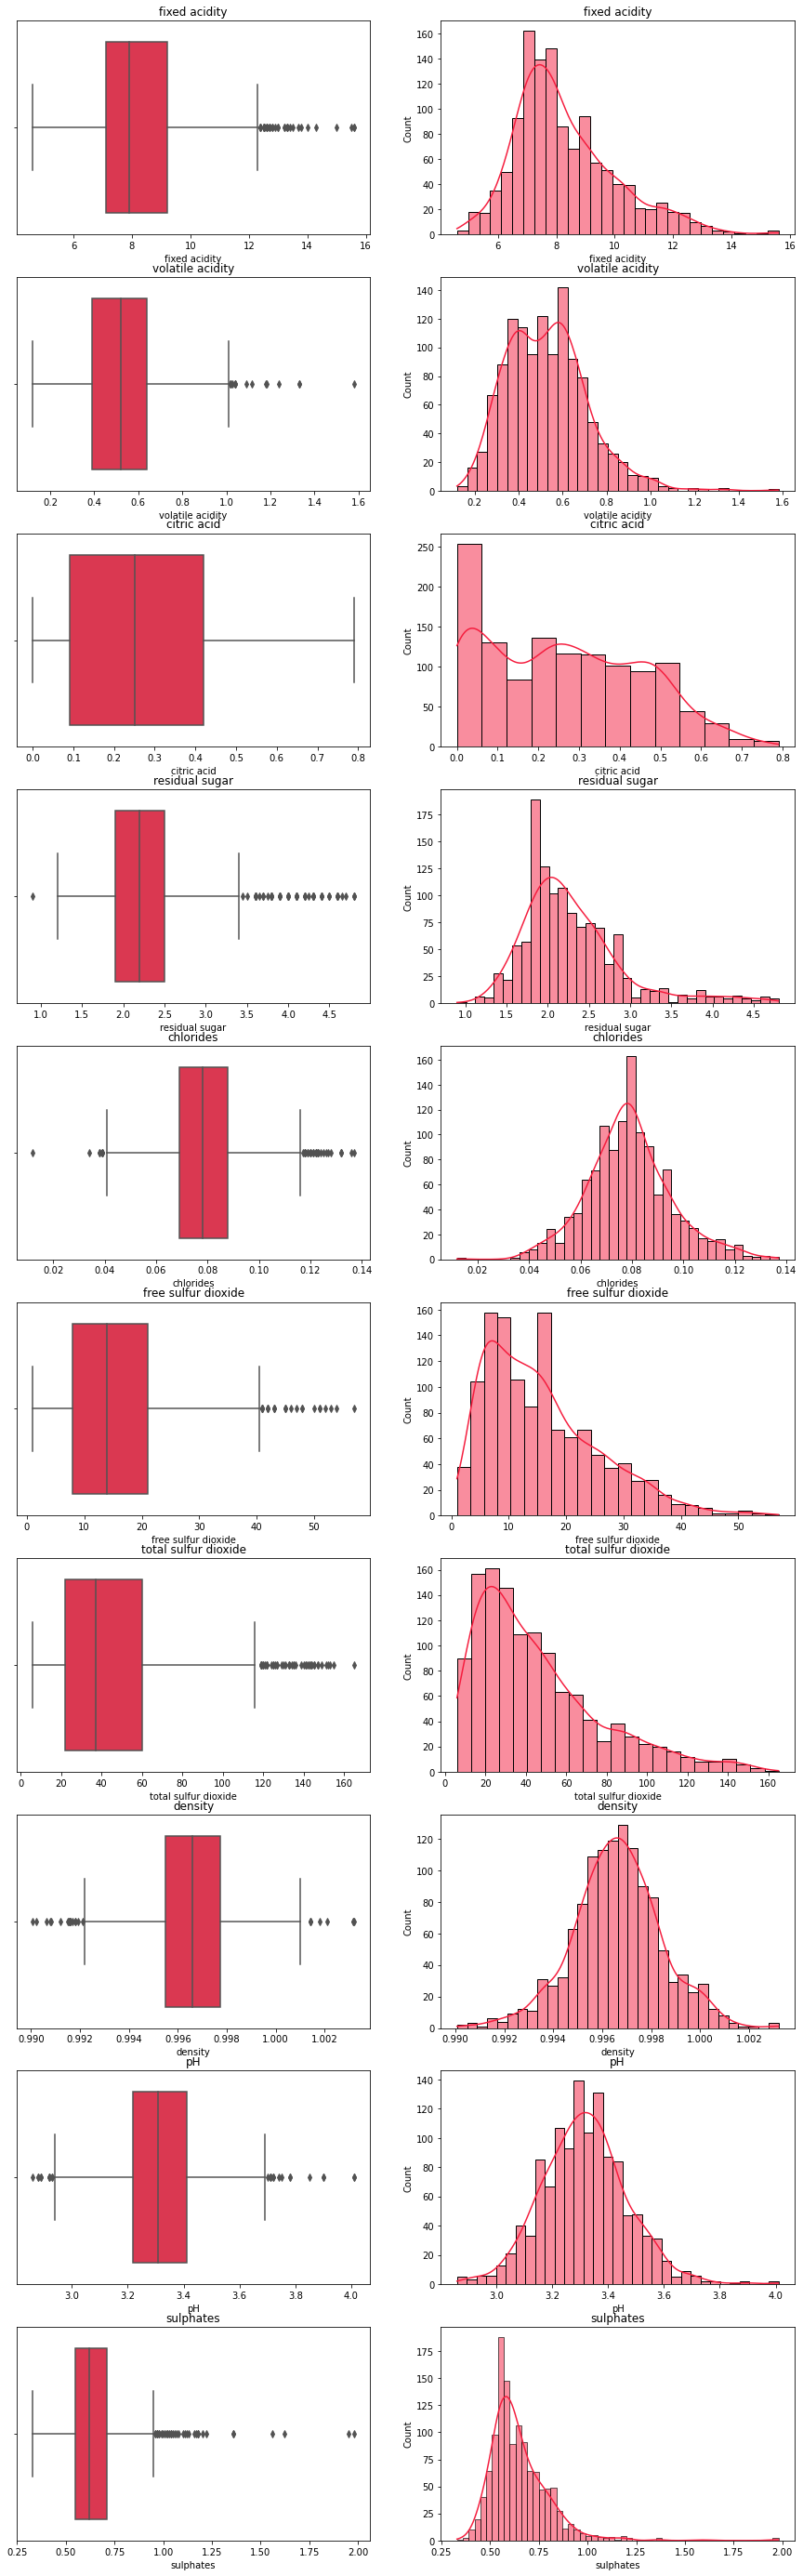

In [40]:
# analisando os dados filtrados por boxplot
var = dfr_clean.columns[:-2].tolist()
plt.figure(figsize=(15,60))

counter = 1

for v in var:
    ax1 = plt.subplot(12, 2, counter)
    ax1.set_title(v)
    sns.boxplot(data = dfr_clean, x = v, color="#f51d3e", ax = ax1)
    counter += 1
    ax2 = plt.subplot(12, 2, counter)
    ax2.set_title(v)
    sns.histplot(data = dfr_clean, x = v, kde = True, color="#f51d3e", ax=ax2)
    counter += 1
    
plt.show()

In [41]:
df_r.shape[0], dfr_clean.shape[0]

(1359, 1228)

**Conclusões:** Todo o dataset foi filtrado por meio das features 'residual sugar' e 'chlorides' de modo que somente as amostras que estiveram abaixo do quantil 0.95 nessas features permaneceram no dataset. Essa filtragem ajudou a eliminar alguns dos pontos atípicos em 'free sulfur dioxide' e 'total sulfur dioxide' sem que estas precisassem ser filtradas separadamente. Com exceção de 'citric acid', todas as outras features parecem seguir distribuição normal com algum grau de assimetria. O dataset filtrado ainda conta com 1.446 amostras (redução de ~10% do total inicial).

### Filtragem do dataset de vinhos brancos

In [43]:
# avaliação geral dos dados do df_w -> 'quality' são dados categóricos ordinais
df_w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


**Conclusões:** Não faltam dados em nenhuma das 12 colunas. Das 12 variáveis, somente 'quality' é categórica (ordinal)

In [45]:
# Verificação de duplicatas
df_w[df_w.duplicated()].shape

(937, 12)

In [46]:
# dropando as duplicatas
df_w.drop_duplicates(inplace = True, keep='first')
df_w.shape

(3961, 12)

In [47]:
# Medidas resumo para vinho branco -> qualidade foi retirado por se tratar de variável categórica
df_w.iloc[:, :11].describe().T

count        mean        std      min        25%  \
fixed acidity         3961.0    6.839346   0.866860  3.80000    6.30000   
volatile acidity      3961.0    0.280538   0.103437  0.08000    0.21000   
citric acid           3961.0    0.334332   0.122446  0.00000    0.27000   
residual sugar        3961.0    5.914819   4.861646  0.60000    1.60000   
chlorides             3961.0    0.045905   0.023103  0.00900    0.03500   
free sulfur dioxide   3961.0   34.889169  17.210021  2.00000   23.00000   
total sulfur dioxide  3961.0  137.193512  43.129065  9.00000  106.00000   
density               3961.0    0.993790   0.002905  0.98711    0.99162   
pH                    3961.0    3.195458   0.151546  2.72000    3.09000   
sulphates             3961.0    0.490351   0.113523  0.22000    0.41000   
alcohol               3961.0   10.589358   1.217076  8.00000    9.50000   

                           50%        75%        max  
fixed acidity           6.8000    7.30000   14.20000  
volatile acidity        0.2600    0.33000    1.10000  
citric acid             0.3200    0.39000    1.66000  
residual sugar          4.7000    8.90000   65.80000  
chlorides               0.0420    0.05000    0.34600  
free sulfur dioxide    33.0000   45.00000  289.00000  
total sulfur dioxide  133.0000  166.00000  440.00000  
density                 0.9935    0.99571    1.03898  
pH                      3.1800    3.29000    3.82000  
sulphates               0.4800    0.55000    1.08000  
alcohol                10.4000   11.40000   14.20000

**Conclusões:** As colunas 'residual sugar', 'chlorides' e 'free sulfur dioxide' possuem valores máximos que destoam demais da média e da mediana. Podem ser pontos atípicos.

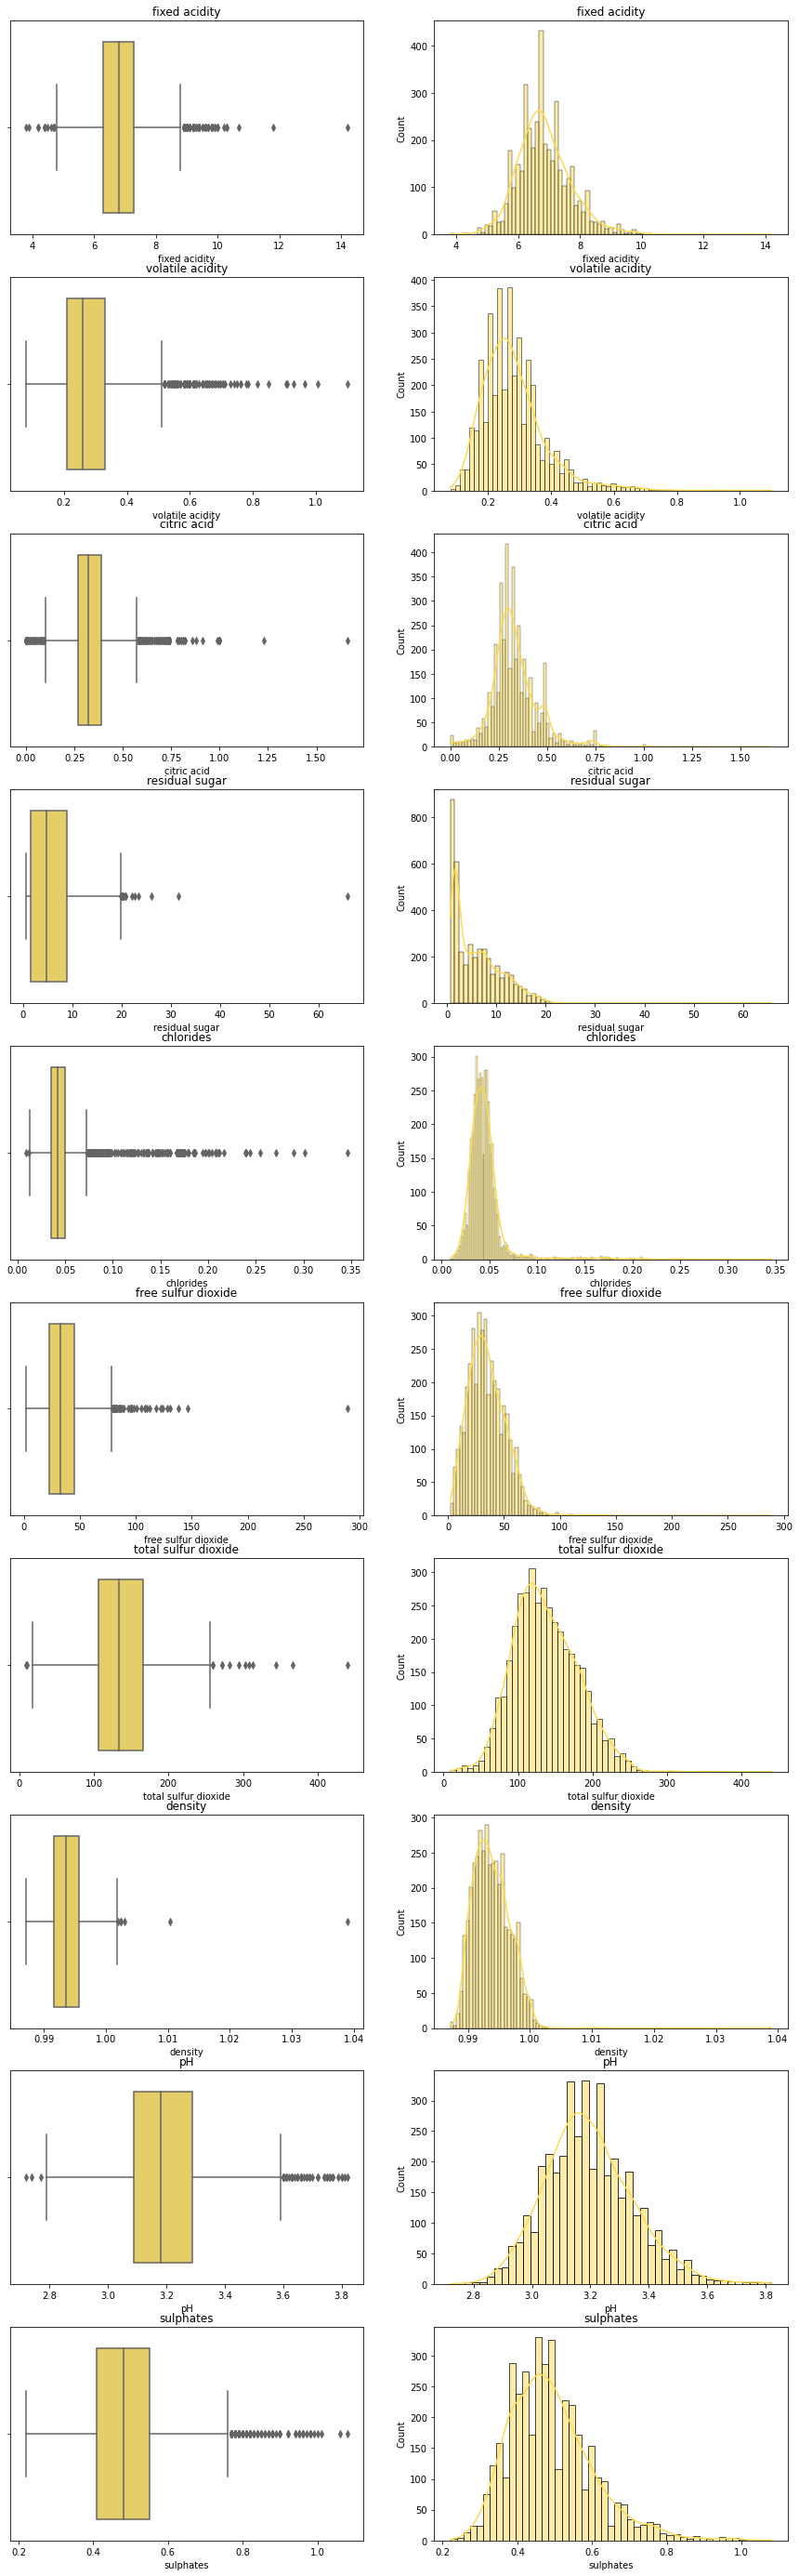

In [48]:
# analisando os dados de vinho branco por boxplot e histograma
var = df_w.columns[:-2].tolist()
plt.figure(figsize=(15,60))

counter = 1

for v in var:
    ax1 = plt.subplot(12, 2, counter)
    ax1.set_title(v)
    sns.boxplot(data = df_w, x = v, color="#fadb52", ax = ax1)
    counter += 1
    ax2 = plt.subplot(12, 2, counter)
    ax2.set_title(v)
    sns.histplot(data = df_w, x = v, kde = True, color="#fadb52", ax=ax2)
    counter += 1
    
plt.show()

In [49]:
# limpando os dados com base no quantil 0.95
dfw_clean = df_w[(df_w['volatile acidity'] <= np.quantile(df_w['volatile acidity'], 0.99)) &
                (df_w['citric acid'] <= np.quantile(df_w['citric acid'], 0.99)) &
                (df_w['chlorides'] <= np.quantile(df_w['chlorides'], 0.975)) &
                (df_w['free sulfur dioxide'] <= np.quantile(df_w['free sulfur dioxide'], 0.99))]

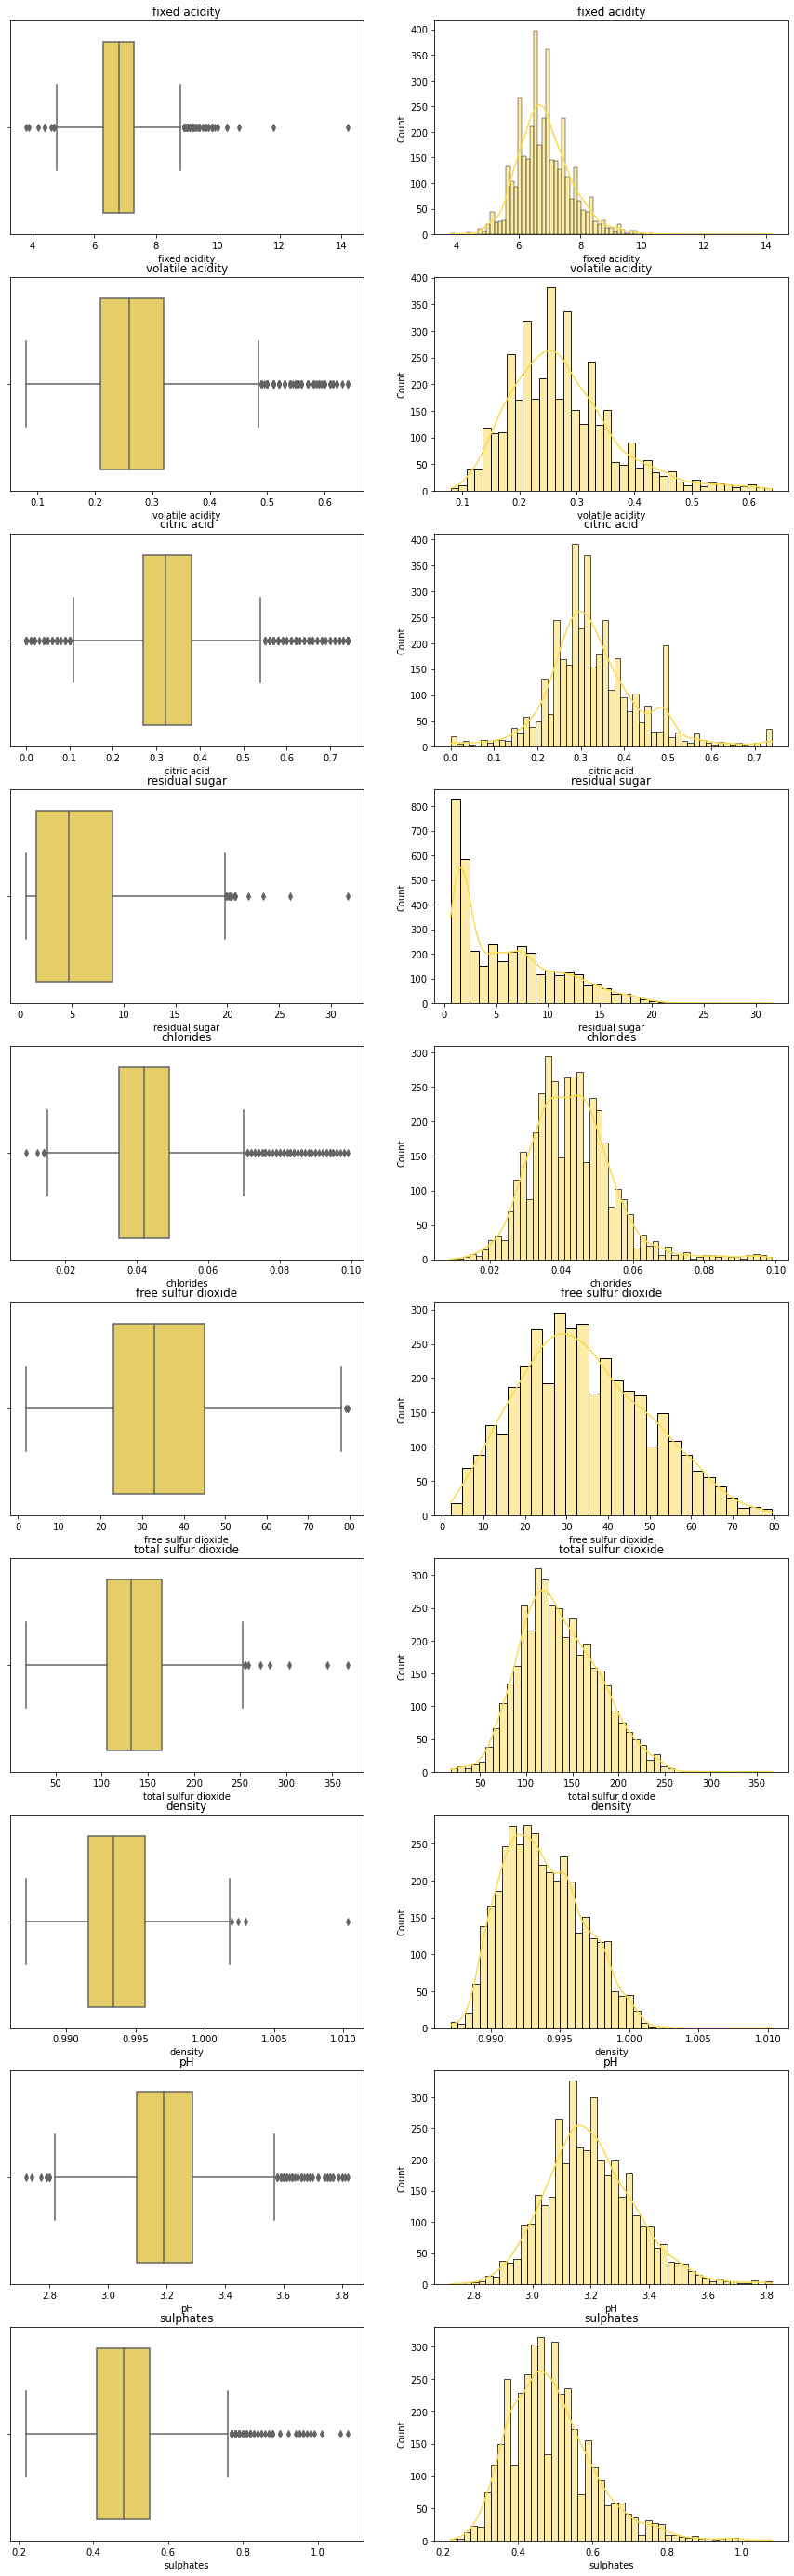

In [50]:
# analisando os dados por boxplot
var = dfw_clean.columns[:-2].tolist()
plt.figure(figsize=(15,60))

counter = 1

for v in var:
    ax1 = plt.subplot(12, 2, counter)
    ax1.set_title(v)
    sns.boxplot(data = dfw_clean, x = v, color="#fadb52", ax = ax1)
    counter += 1
    ax2 = plt.subplot(12, 2, counter)
    ax2.set_title(v)
    sns.histplot(data = dfw_clean, x = v, kde = True, color="#fadb52", ax=ax2)
    counter += 1
    
plt.show()

In [51]:
df_w.shape[0], dfw_clean.shape[0]

(3961, 3772)

**Conclusões:** A partir de filtragem das features 'colatile acidity' (quantil 0.99), 'citric acid' (quantil 0.99), 'chlorides' (quantil 0.975) e 'free sulfur dioxide' (quantil 0.99), os gráficos mostram que os valores voltam para a normalidade. Somente residual sugar parece não seguir a normalidade. Com a limpeza houve perda de aproximadamente 5% das amostras.

---

# Análise exploratória dos dados

### Vinho vermelho

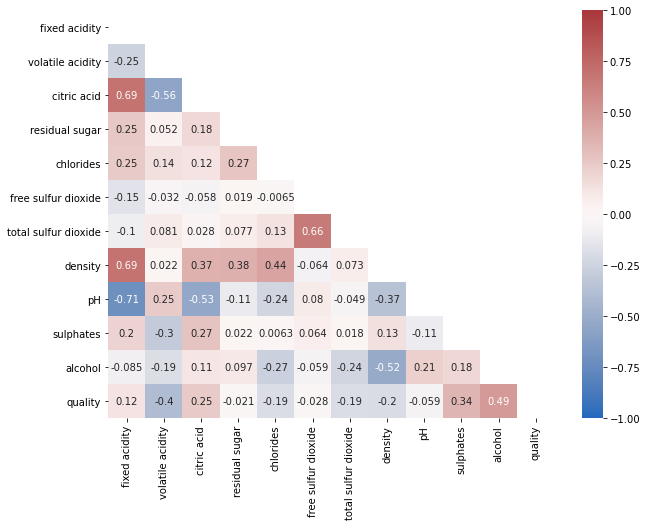

In [53]:
# Análise de correlação de Pearson entre as variáveis para vinho vermelho
cor = dfr_clean[dfr_clean.columns] # são todas as colunas que serão estudadas
plt.figure(figsize=(10, 7.5))
sns.heatmap(data = cor.corr("pearson"), annot=True,
            cmap=sns.color_palette("vlag", as_cmap=True),
            vmin=-1,
            vmax=1,
            mask = np.triu(cor.corr("pearson")))

plt.show()

**Conclusões:**<br><br>
**Correlações fortes:**<br>
- 'fixed acitidy' e 'citric acid' (+0.69)
- 'fixed acitidy' e 'density' (+0.69)
- 'fixed acitidy' e 'pH' (-0.70)
- 'total sulfur dioxide' e 'free sulfur dioxide' (+0.66)

**Correlações moderadas foram encontradas entre:**<br>
- 'citric acid' e 'volatile acidity' (-0.57)
- 'pH' e 'citric acid' (-0.53)
- 'density' e 'chlorides' (+0.44)
- 'alcohol' e 'density' (-0.51)
- 'quality' e 'alcohol' (+0.49)

In [18]:
#sns.pairplot(data = dfr_clean)
#plt.show()

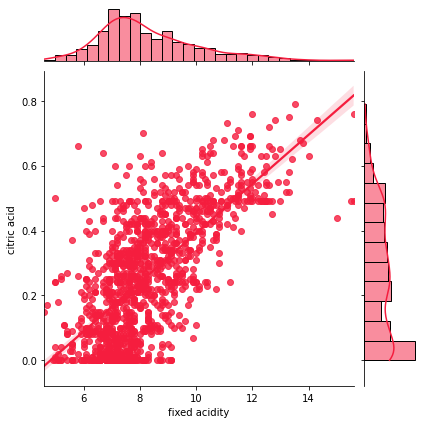

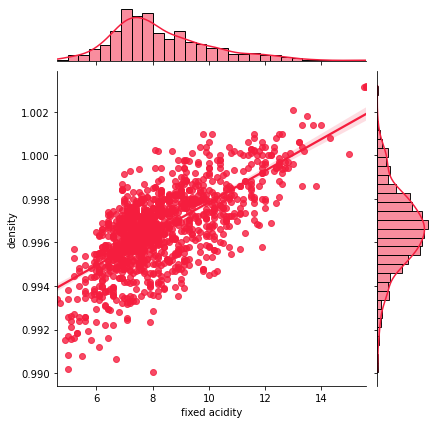

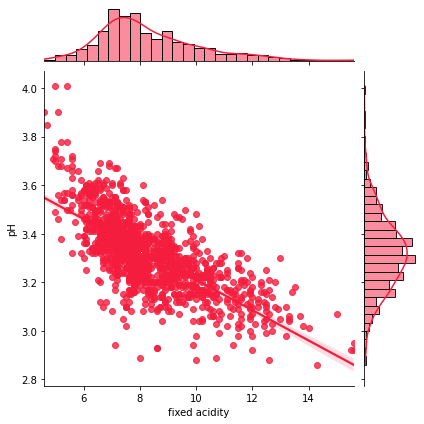

In [54]:
# Avaliação dois a dois baseada no pairplot
## 'fixed acidity'

for y in ["citric acid", "density", "pH"]:
    sns.jointplot(data = dfr_clean, x = 'fixed acidity', y = y, kind = 'reg', color="#f51d3e")

plt.show()

**Conclusões:** Parece que a correlação de Pearson encontrada pode ser bem explicada por um regressão linear como mostrado pelo pairplot.

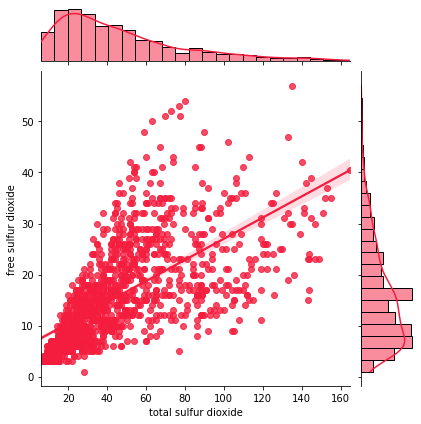

In [55]:
# Avaliação dois a dois baseada no pairplot
## total sulfur dioxide

sns.jointplot(data = dfr_clean, x = 'total sulfur dioxide', y = 'free sulfur dioxide', kind = 'reg', color='#f51d3e')
plt.show()

**Conclusões:** A relação entre dióxido de enxofre total e livre não é bem explicada por uma reta, visto que valores mais altos de SO2 total levam a maior variação na quantidade livre de SO2 livre.

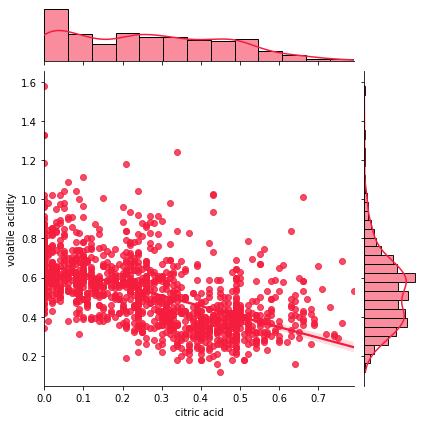

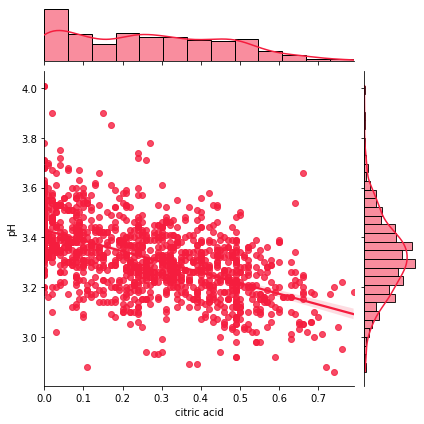

In [56]:
# Avaliação dois a dois baseada no pairplot
## citric acid

for y in ["volatile acidity", 'pH']:
    sns.jointplot(data = dfr_clean, x = 'citric acid', y = y, kind = 'reg', color="#f51d3e")

plt.show()

**Conclusões:** Parece que a correlação de Pearson encontrada pode ser bem explicada por um regressão linear como mostrado pelo pairplot.

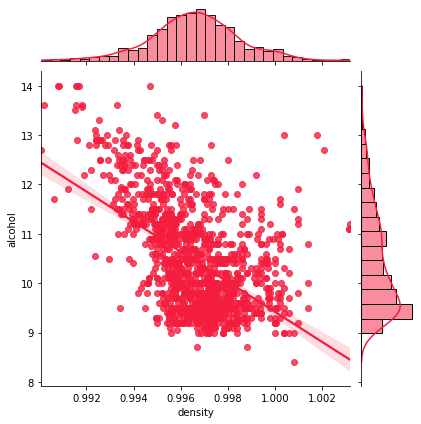

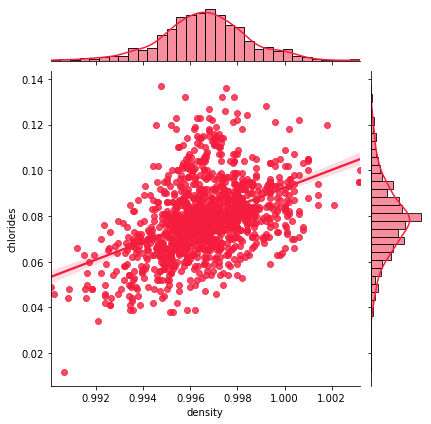

In [57]:
# Avaliação dois a dois baseada no pairplot
## density
for y in ["alcohol", 'chlorides']:
    sns.jointplot(data = dfr_clean, x = 'density', y = y, kind = 'reg', color="#f51d3e")
    
plt.show()

**Conclusões:** Parece que a correlação de Pearson encontrada pode ser bem explicada por um regressão linear como mostrado pelo pairplot.

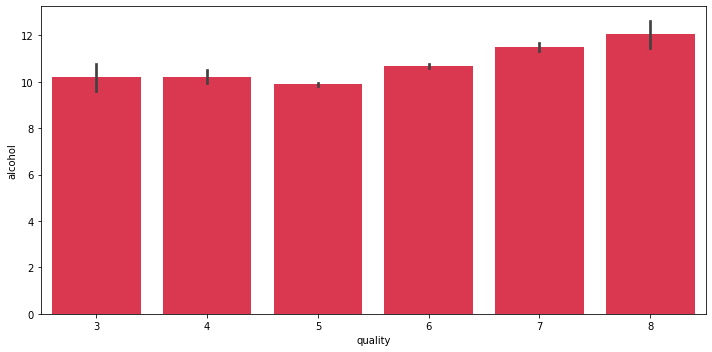

In [58]:
# Avaliação dois a dois baseada no pairplot

plt.figure(figsize=(10,5))

sns.barplot(data = dfr_clean, x = 'quality', y = 'alcohol', color = '#f51d3e')


plt.tight_layout()
plt.show()

**Conclusões:** Vinhos melhor classificados possuem teor alcoólico mais alto no geral (com exceção da nota 5).

### Vinho branco

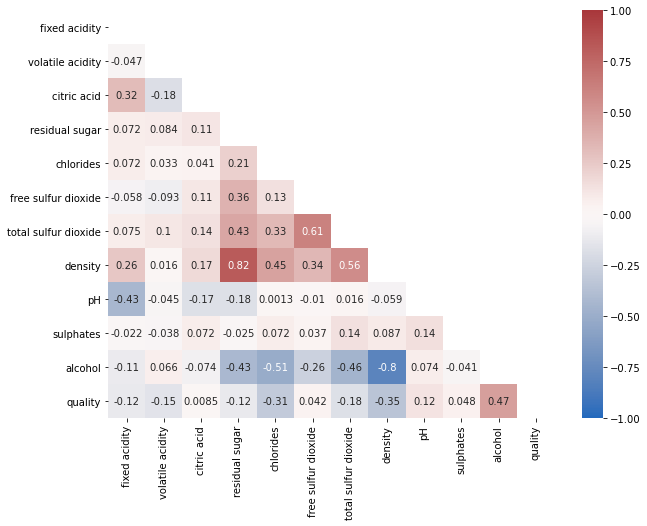

In [59]:
# Análise de correlação de Pearson entre as variáveis para vinho vermelho
cor = dfw_clean[dfw_clean.columns] # são todas as colunas que serão estudadas
plt.figure(figsize=(10, 7.5))
sns.heatmap(data = cor.corr("pearson"), annot=True,
            cmap=sns.color_palette("vlag", as_cmap=True),
            vmin=-1,
            vmax=1,
            mask = np.triu(cor.corr("pearson")))

plt.show()

**Conclusões:**<br><br>
**Correlações fortes:**<br>
- 'density' e 'residual sugar' (+0.84)
- 'density' e 'alcohol' (-0.81)

**Correlações moderadas foram encontradas entre:**<br>
- 'pH' e 'fixed acidity' (-0.42)
- 'total sulfur dioxide' e 'free sulfur dioxide' (+0.61)
- 'density' e 'total sulfur dioxide' (+0.55)
- 'alcohol' e 'chlorides' (-0.53)
- 'alcohol' e 'residual sugar' (-0.48)
- 'alcohol' e 'total sulfur dioxide' (-0.46)
- 'density' e 'chlorides' (+0.47)
- 'residual sugar' e 'total sulfur dioxide' (+0.42)

In [25]:
#sns.pairplot(data = dfw_clean)
#plt.show()

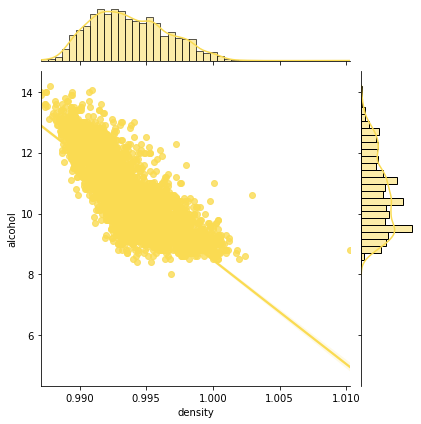

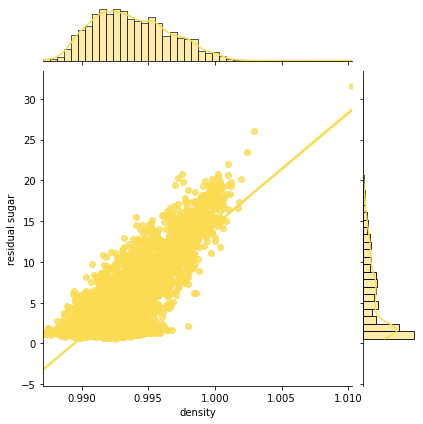

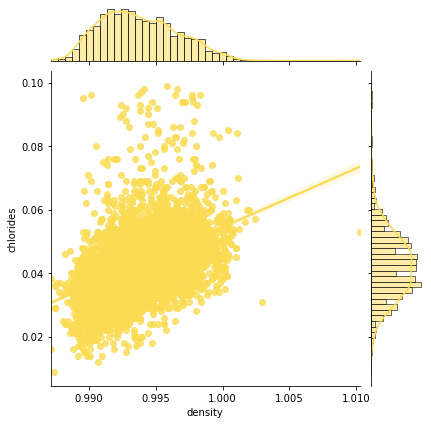

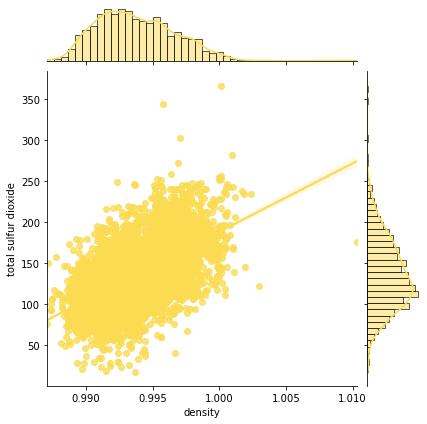

In [60]:
# Avaliação dois a dois baseada no pairplot
## density

for y in ["alcohol", "residual sugar", "chlorides", "total sulfur dioxide"]:
    sns.jointplot(data = dfw_clean, x = 'density', y = y, kind = 'reg', color="#fadb52")

plt.show()

**Conclusões:** A relação entre 'density' e 'residual sugar' e 'density' e 'alcohol' podem ser explicadas por regressão linear em algum grau. Já a relação com 'chlorides' e com 'total sulfur dioxide' é menos intensa, o que já era esperado, pois as correlações eram moderadas.

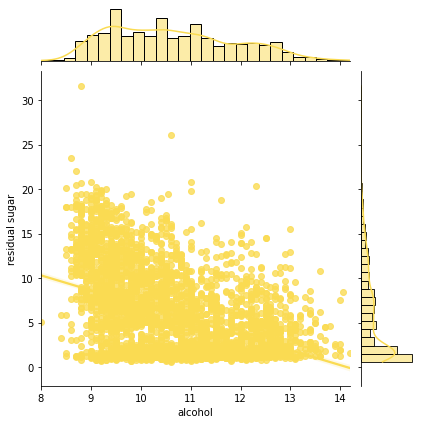

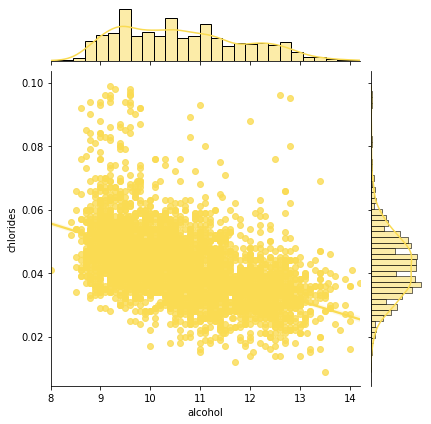

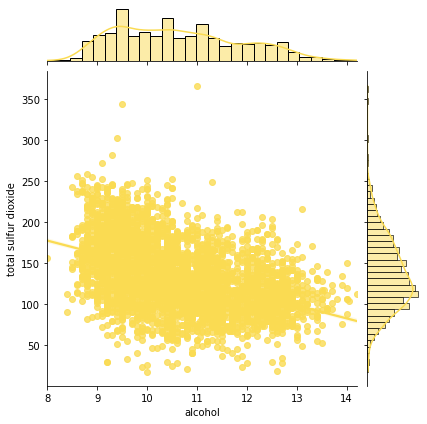

In [61]:
# Avaliação dois a dois baseada no pairplot
## alcohol

for y in ["residual sugar", "chlorides", "total sulfur dioxide"]:
    sns.jointplot(data = dfw_clean, x = 'alcohol', y = y, kind = 'reg', color="#fadb52")

plt.show()

**Conclusões:** As correlações de 'alcohol' com 'residual sugar', 'chlorides', 'total sulfur dioxide' são moderadas e não são bem explicadas por regressão linear.

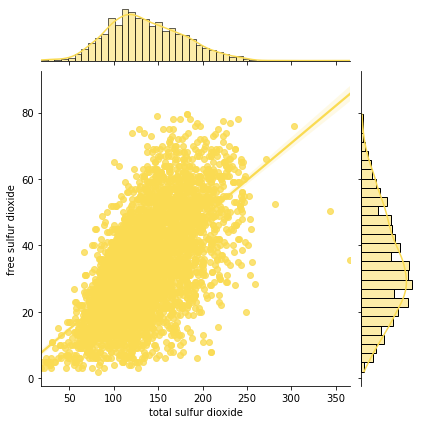

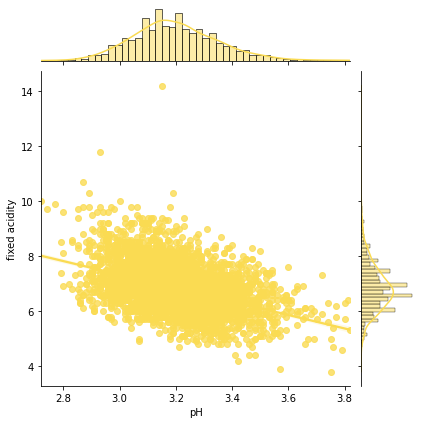

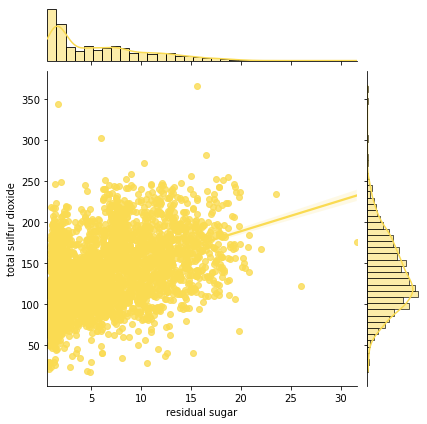

In [62]:
# Avaliação dois a dois baseada no pairplot
## 'total sulfur dioxide' e 'free sulfur dioxide' (+0.61)
sns.jointplot(data = dfw_clean, x = 'total sulfur dioxide', y = 'free sulfur dioxide', kind = 'reg', color="#fadb52")

## 'pH' e 'fixed acidity' (-0.42)
sns.jointplot(data = dfw_clean, x = 'pH', y = 'fixed acidity', kind = 'reg', color="#fadb52")

## 'residual sugar' e 'total sulfur dioxide' (+0.42)
sns.jointplot(data = dfw_clean, x = 'residual sugar', y = 'total sulfur dioxide', kind = 'reg', color="#fadb52")

plt.show()

**Conclusões:** A relação entre 'residual sugar' e 'total sulfur dioxide' correlações de 'alcohol' com 'residual sugar', 'chlorides', 'total sulfur dioxide' são moderadas e não são bem explicadas por regressão linear.

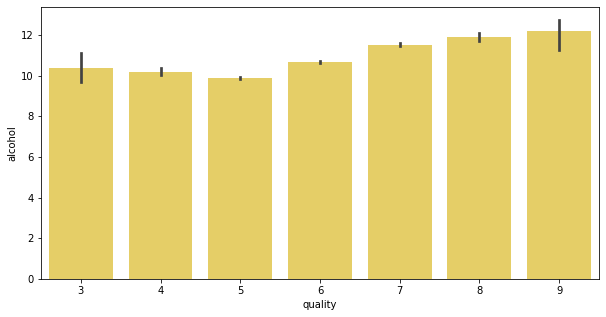

In [63]:
# Avaliação dois a dois baseada no pairplot
## quality  -> alcohol
plt.figure(figsize=(10,5))

sns.barplot(data = dfw_clean, x = 'quality', y = 'alcohol', color = '#fadb52')

plt.show()

**Conclusão:** Parece existir um relação entre as notas do vinho e a concentração de álcool neles (com exceção da nota 5).

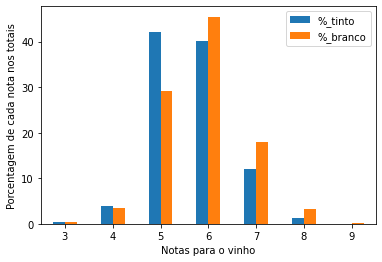

In [64]:
# proporção de cada nota do vinho tinto organizada pelo index
nota_r = dfr_clean.quality.value_counts(normalize=True).sort_index() * 100
nota_w = dfw_clean.quality.value_counts(normalize=True).sort_index() * 100
notas = pd.concat([nota_r, nota_w], axis = 1)
notas.columns = ['%_tinto', '%_branco']

# visualização
notas.plot(kind = 'bar', rot = 0)
plt.xlabel("Notas para o vinho")
plt.ylabel("Porcentagem de cada nota nos totais")
plt.show()

---

### Vinho vermelho vs vinho branco

In [65]:
# verificando se a ordem das colunas é a mesma entre os datasets
dfr_clean.columns == dfw_clean.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [66]:
# criando uma tag para vinhos vermelhos e brancos para juntar os datasets limpos
dfr_clean['tag'] = 'red'
dfw_clean['tag'] = 'white'

# criando classificação de qualidade 'low' e 'high' para os vinhos branco e vermelho para juntar os datasets limpos
## vermelho
dfr_clean.loc[dfr_clean.quality < 6, 'quality_rank'] = "low" # ranqueando como baixa qualidade na coluna quality_rank a partir da coluna quality
dfr_clean.loc[dfr_clean.quality_rank.isna(), 'quality_rank'] = "high" # ranqueando como alto a partir dos NaN restantes da coluna quality
## branco
dfw_clean.loc[dfw_clean.quality < 6, 'quality_rank'] = "low" # ranqueando como baixa qualidade na coluna quality_rank a partir da coluna quality
dfw_clean.loc[dfw_clean.quality_rank.isna(), 'quality_rank'] = "high" # ranqueando como alto a partir dos NaN restantes da coluna quality

# concatenando os datasets
df = pd.concat([dfr_clean, dfw_clean], ignore_index=True, verify_integrity=True)
display(df.head(), df.tail())

C:\Users\Diego\AppData\Local\Temp/ipykernel_12764/4150756331.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfw_clean['tag'] = 'white'
C:\Users\Diego\anaconda3\envs\datascience\lib\site-packages\pandas\core\indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\Diego\anaconda3\envs\datascience\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.66         0.00             1.8      0.075   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 13.0                  40.0   0.9978  3.51       0.56   

   alcohol  quality  tag quality_rank  
0      9.4        5  red          low  
1      9.8        5  red          low  
2      9.8        5  red          low  
3      9.8        6  red         high  
4      9.4        5  red          low

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
4995            6.2              0.21         0.29             1.6      0.039   
4996            6.6              0.32         0.36             8.0      0.047   
4997            6.5              0.24         0.19             1.2      0.041   
4998            5.5              0.29         0.30             1.1      0.022   
4999            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
4995                 24.0                  92.0  0.99114  3.27       0.50   
4996                 57.0                 168.0  0.99490  3.15       0.46   
4997                 30.0                 111.0  0.99254  2.99       0.46   
4998                 20.0                 110.0  0.98869  3.34       0.38   
4999                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality    tag quality_rank  
4995     11.2        6  white         high  
4996      9.6        5  white          low  
4997      9.4        6  white         high  
4998     12.8        7  white         high  
4999     11.8        6  white         high

In [67]:
# funções para encontrar percentis no dataset
def p25(x):
    '''
    Retorna o percentil 0.25
    '''
    return np.quantile(x, 0.25)

def p75(x):
    '''
    Retorna o percentil 0.75
    '''
    return np.quantile(x, 0.75)

# Agrupando o dataset por tipo de vinho e separando a avaliação pelas medidas descritivas abaixo -> As colunas viram índices
df_desc = df.groupby(by='tag').agg(['count', 'mean', 'std', 'min', p25 ,'median', p75, 'max']).T

# Gerando visualização das medidas descritivas separadas por coluna e por tipo de vinho
for col in df.columns[:-1]: # todas as colunas com exceção da última (tag)
    print(col) # print o nome da coluna (que é índice neste dataset df_desc)
    display(df_desc.loc[col,:]) # Mostra todas as colunas do índice 'col'
    print("\n")# insere espaço para melhorar a visualização

fixed acidity


tag             red        white
count   1228.000000  3772.000000
mean       8.299104     6.841119
std        1.744641     0.864641
min        4.600000     3.800000
p25        7.100000     6.300000
median     7.900000     6.800000
p75        9.200000     7.300000
max       15.600000    14.200000



volatile acidity


tag             red        white
count   1228.000000  3772.000000
mean       0.527704     0.274853
std        0.182671     0.091565
min        0.120000     0.080000
p25        0.390000     0.210000
median     0.520000     0.260000
p75        0.640000     0.320000
max        1.580000     0.640000



citric acid


tag             red        white
count   1228.000000  3772.000000
mean       0.263037     0.330581
std        0.190963     0.110973
min        0.000000     0.000000
p25        0.090000     0.270000
median     0.250000     0.320000
p75        0.420000     0.380000
max        0.790000     0.740000



residual sugar


tag             red        white
count   1228.000000  3772.000000
mean       2.287215     5.908616
std        0.611826     4.765803
min        0.900000     0.600000
p25        1.900000     1.600000
median     2.200000     4.700000
p75        2.500000     8.900000
max        4.800000    31.600000



chlorides


tag             red        white
count   1228.000000  3772.000000
mean       0.079025     0.042869
std        0.016383     0.011593
min        0.012000     0.009000
p25        0.069000     0.035000
median     0.078000     0.042000
p75        0.088000     0.049000
max        0.137000     0.099000



free sulfur dioxide


tag             red        white
count   1228.000000  3772.000000
mean      15.724349    34.127651
std        9.849062    15.349420
min        1.000000     2.000000
p25        8.000000    23.000000
median    14.000000    33.000000
p75       21.000000    45.000000
max       57.000000    79.500000



total sulfur dioxide


tag             red        white
count   1228.000000  3772.000000
mean      45.561482   136.239926
std       31.128046    42.057870
min        6.000000    18.000000
p25       22.000000   106.000000
median    37.000000   132.000000
p75       60.000000   165.000000
max      165.000000   366.500000



density


tag             red        white
count   1228.000000  3772.000000
mean       0.996608     0.993745
std        0.001831     0.002825
min        0.990070     0.987110
p25        0.995507     0.991580
median     0.996600     0.993400
p75        0.997740     0.995700
max        1.003200     1.010300



pH


tag             red        white
count   1228.000000  3772.000000
mean       3.317003     3.198147
std        0.153484     0.151587
min        2.860000     2.720000
p25        3.220000     3.100000
median     3.310000     3.190000
p75        3.410000     3.290000
max        4.010000     3.820000



sulphates


tag             red        white
count   1228.000000  3772.000000
mean       0.646002     0.490255
std        0.150496     0.112695
min        0.330000     0.220000
p25        0.550000     0.410000
median     0.620000     0.480000
p75        0.712500     0.550000
max        1.980000     1.080000



alcohol


tag             red        white
count   1228.000000  3772.000000
mean      10.453298    10.617854
std        1.070118     1.212459
min        8.400000     8.000000
p25        9.500000     9.600000
median    10.200000    10.500000
p75       11.125000    11.408333
max       14.000000    14.200000



quality


tag             red        white
count   1228.000000  3772.000000
mean       5.632736     5.877784
std        0.809159     0.883068
min        3.000000     3.000000
p25        5.000000     5.000000
median     6.000000     6.000000
p75        6.000000     6.000000
max        8.000000     9.000000



tag


KeyError: 'tag'

In [69]:
df.columns[:-3]

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

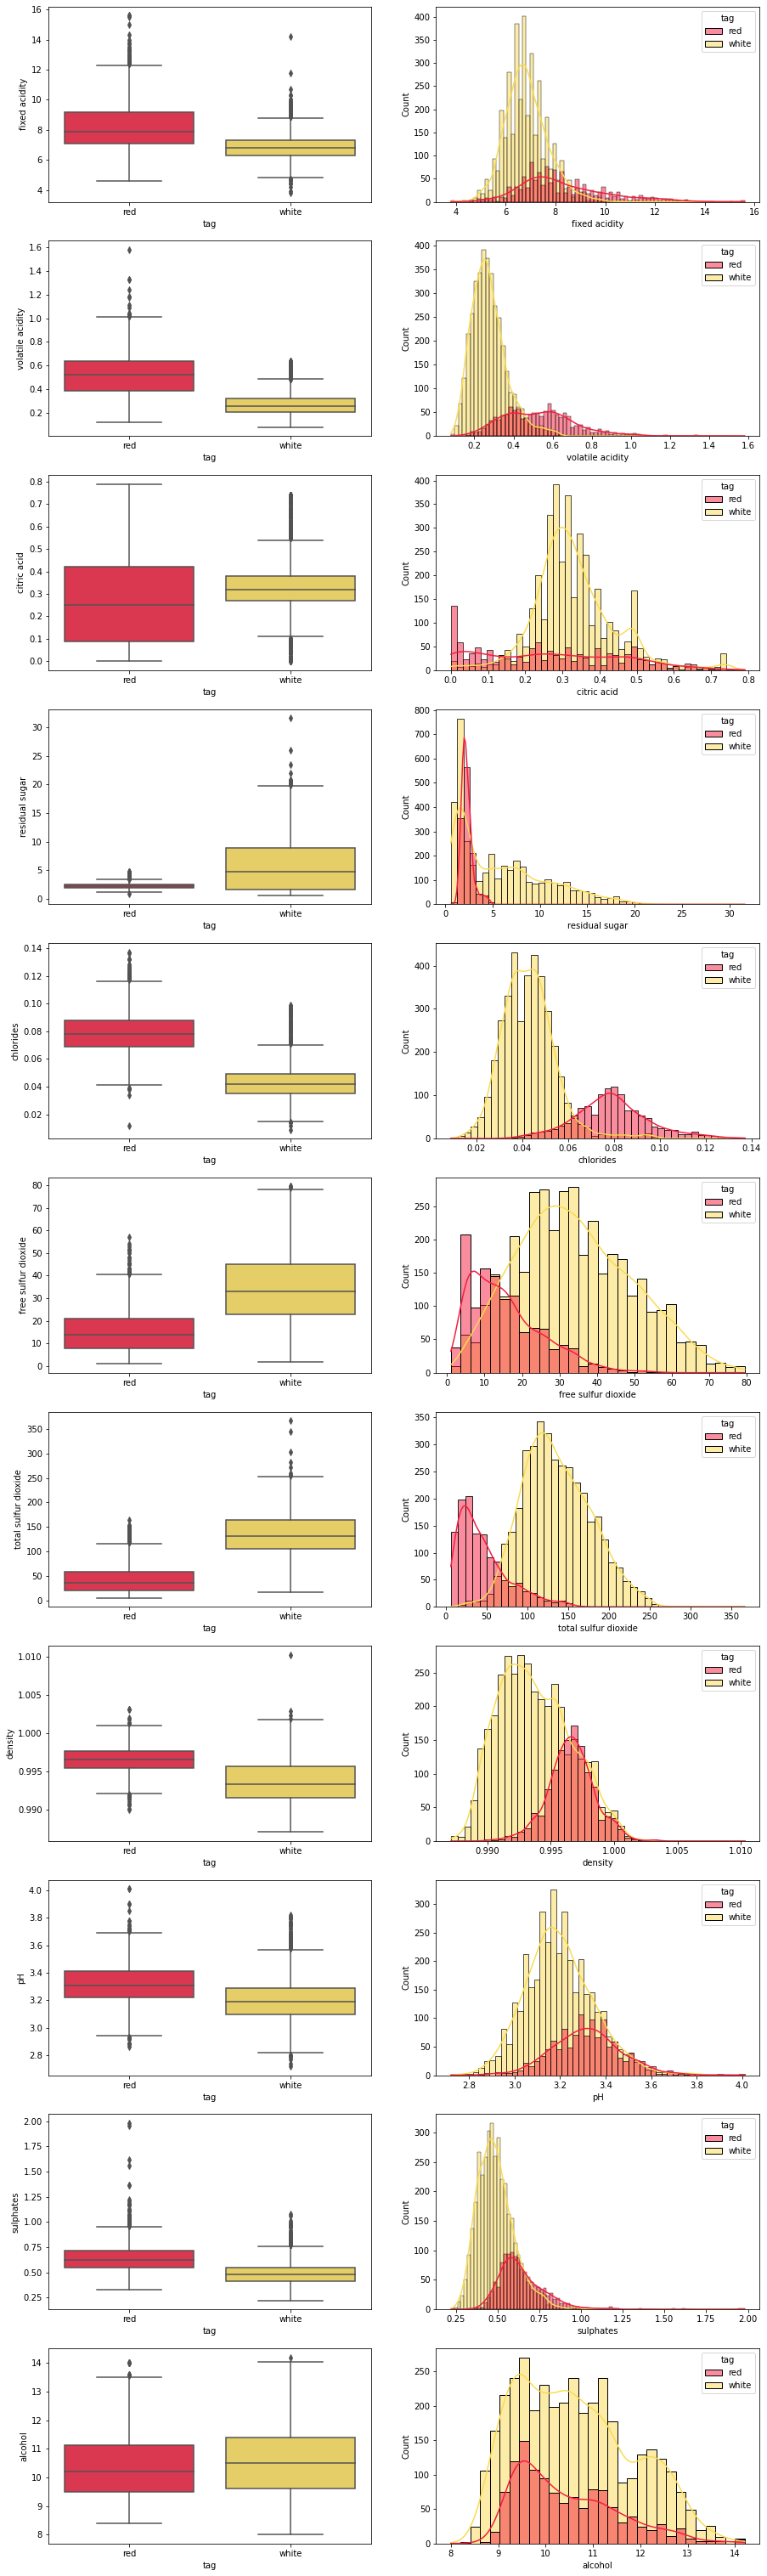

In [70]:
# analisando os dados por feature e por tipo de vinho por boxplot e histograma
## criando a figura e configurando o tamanho
plt.figure(figsize=(15,60))

## Escolhendo as cores que serão utilizadas nos gráficos para cada categoria de vinho
colors = ["#f51d3e", "#fadb52"]
sns.set_palette(sns.color_palette(colors))

## Gerando os gráficos por iteração
var = df.columns[:-3]

counter = 1 # contador para gerar automaticamente as figuras nas posições desejadas

for v in var: # para cada variável em variáveis
    # gera o boxplot na esquerda e atualiza o contador
    ax1 = plt.subplot(12, 2, counter)
    sns.boxplot(data = df, x = 'tag', y = v, ax = ax1)
    counter += 1
    # gera o histograma equivalente ao boxplot na direita e atualiza o contador
    ax2 = plt.subplot(12, 2, counter)
    sns.histplot(data = df, x = v, hue = 'tag', kde = True, ax=ax2)
    counter += 1

plt.show()

**Conclusões:** 'fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH' e 'sulphates' poderiam ser boas features para separar os vinhos por tipo. Uma análise estatística (t-student) poderia indicar se as médias são diferentes.

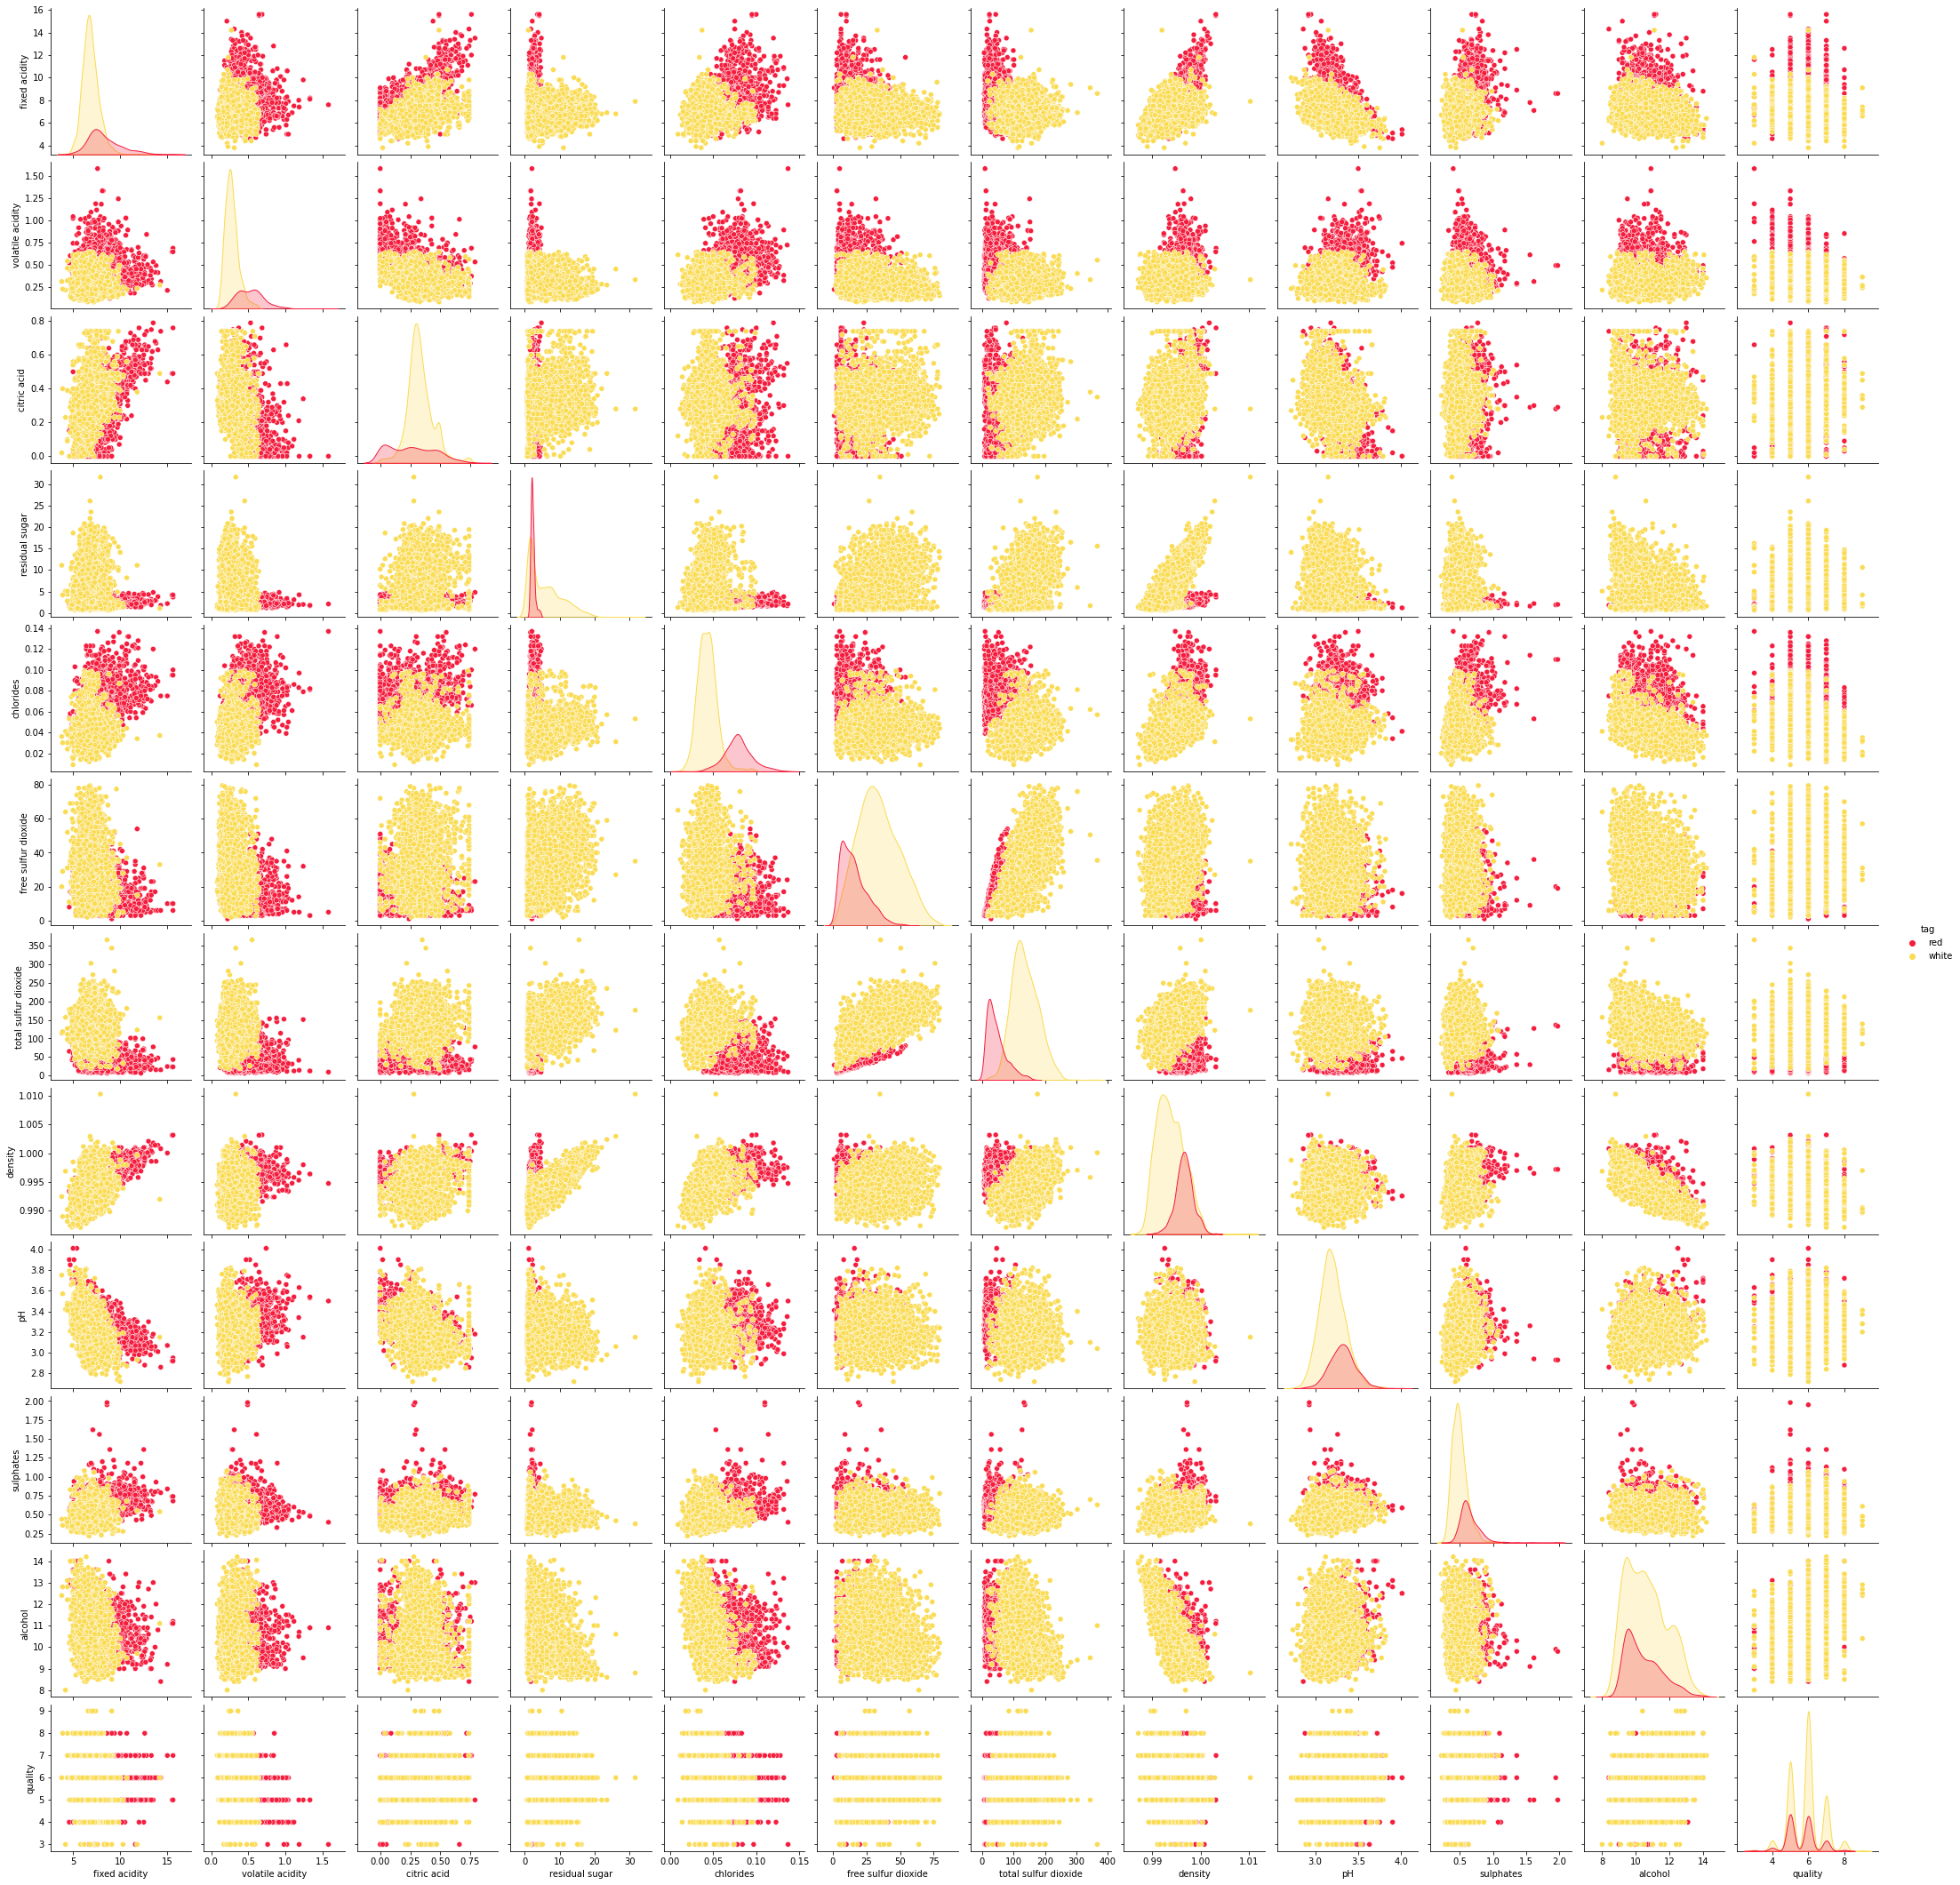

In [71]:
# pairplot considerando as diferenças entre branco e tinto
#sns.pairplot(df, hue = 'tag')
#plt.show()

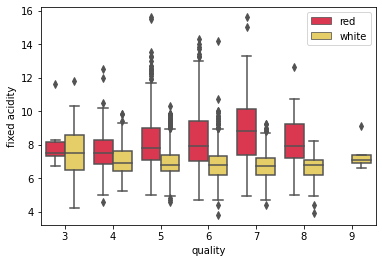

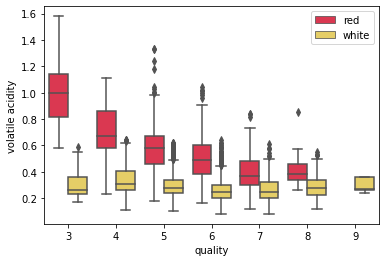

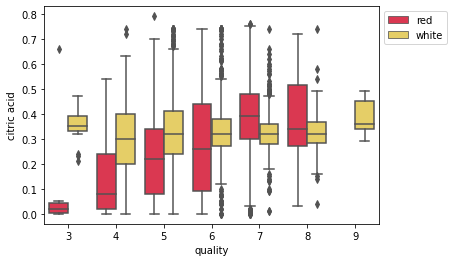

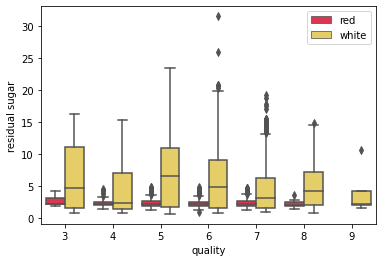

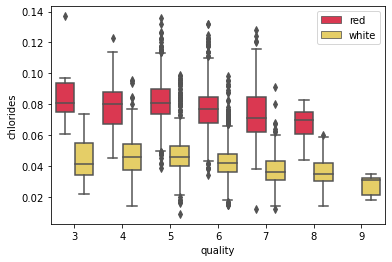

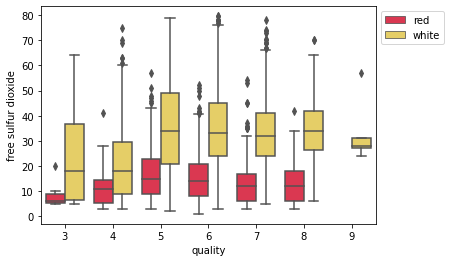

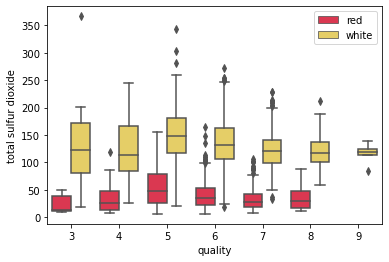

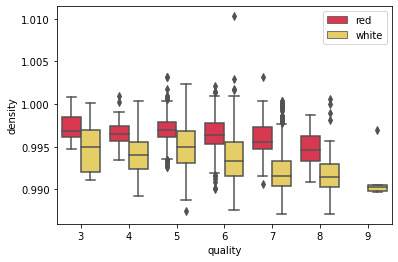

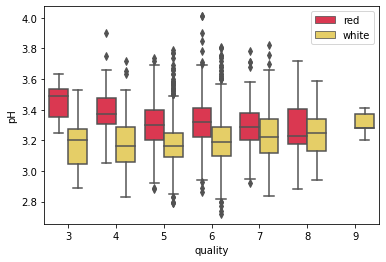

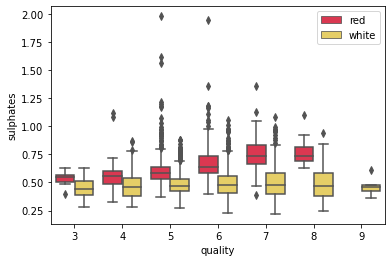

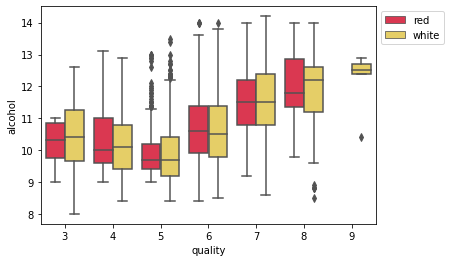

In [73]:
# avaliando o impacto dos fatores bioquímicos sobre a qualidade em notas
for col in df.columns[:-3]:
    sns.boxplot(data = df, x = 'quality', y = col, hue = 'tag')
    plt.legend(bbox_to_anchor=(1, 1))
    plt.show()

**Conclusões:** Padrões para serem testados:<br>
- Quanto mais 'volatile acidity' menor a nota do vinho vermelho. Não parece ter padrão parecido com vinho branco;
- Quanto mais 'citric acid' maior a nota do vinho vermelho. Não parece ter padrão parecido com vinho branco;
- Vinhos brancos e vermelhos menos densos parecem receber notas maiores;
- Quanto mais 'sulphates' maior a nota do vinho vermelho. Não parece ter padrão parecido com vinho branco;
- A relação de álcool com a nota é visto aqui novamente para ambos os tipos. Maior teor alcoólico, maior nota.

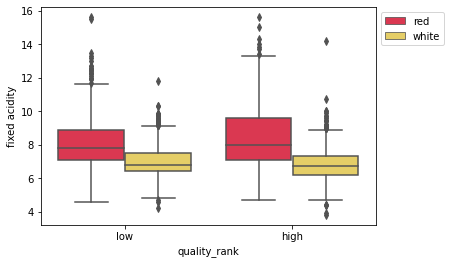

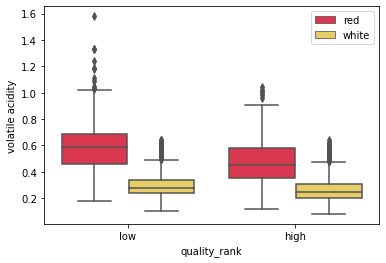

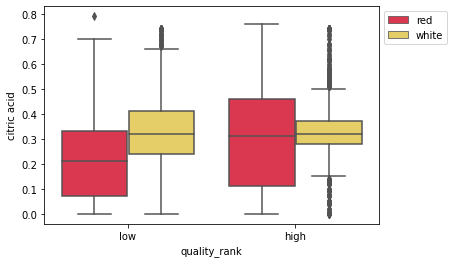

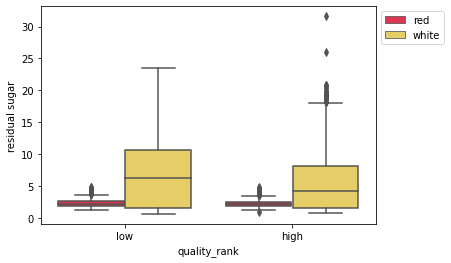

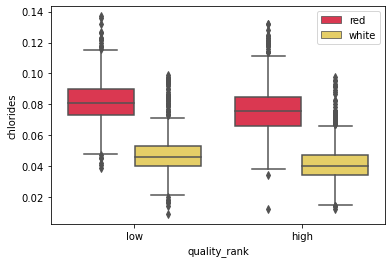

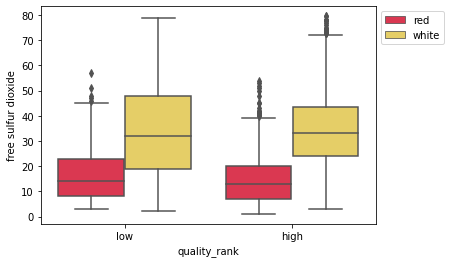

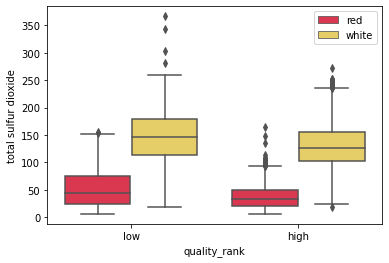

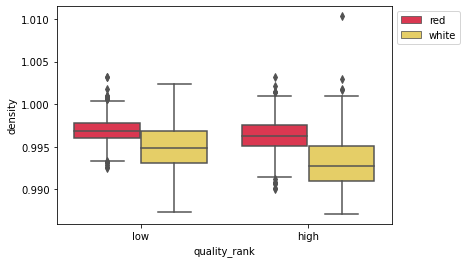

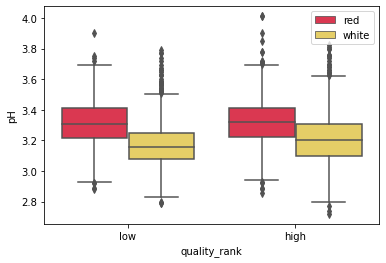

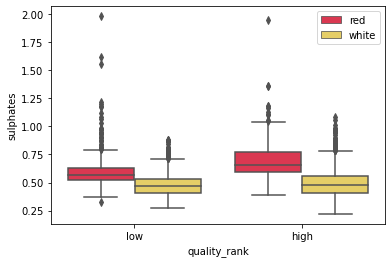

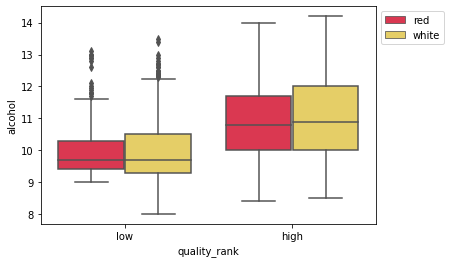

In [74]:
# avaliando o impacto dos fatores bioquímicos sobre a qualidade dos vinhos 'low' e 'high'
for col in df.columns[:-3]:
    sns.boxplot(data = df,
                x = 'quality_rank',
                y = col,
                hue = 'tag' # separar em vermelho e branco. Pode ser removido se só a qualidade importar
               )
    plt.legend(bbox_to_anchor=(1, 1))
    plt.show()

**Conclusões:** Em termos gerais, parece que os vinhos de baixa qualidade possuem menor teor alcoólico.

---

---
# Etapa 2: Modelo de regressão linear<br>
- Faça um algoritmo que estime a variável “Quality” em função das características físico-químicas dos vinhos
- Colocar comentários sobre a técnica utilizada e análise sobre as variáveis utilizadas, além dos seus respectivos “achados”. Faça uma interpretação do resultado

### Regressão linear utilizando todas as features disponíveis<br>
- Vinho vermelho
- **Input:** Variáveis numéricas contínuas / **Output:** Variável categórica ordinal

In [75]:
# TESTANDO VARIAÇÃO NO TAMANHO DO 'test_size'

# criando as variáveis para treino
X = dfr_clean[dfr_clean.columns[:-3]] # todas as colunas até 'alcohol'
y = dfr_clean[dfr_clean.columns[-3]] # somente a coluna 'quality'

for ts in (np.arange(1, 10) / 10):

    # criando os conjuntos de treino e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ts, random_state=42)

    # padronizando os dados entre 0 e 1
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

    # criando o modelo e ajustando o modelo
    lm = LinearRegression()
    lm.fit(X_train, y_train)

    # predições
    y_pred = lm.predict(X_test) # predição dos valores flutuantes
    y_pred = y_pred.round() # arredondamento automático para valores exatos de notas

    # avaliando as métricas
    print('test_size:', ts)
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('R2:', metrics.r2_score(y_test, y_pred))
    print('\n')

test_size: 0.1
RMSE: 0.6115420998078532
R2: 0.3443800695249133


test_size: 0.2
RMSE: 0.6625891564490792
R2: 0.28359174868545234


test_size: 0.3
RMSE: 0.6646310385049539
R2: 0.30674273858921164


test_size: 0.4
RMSE: 0.6940513792747413
R2: 0.24504211691733935


test_size: 0.5
RMSE: 0.7071067811865476
R2: 0.2292992068034998


test_size: 0.6
RMSE: 0.6930552968593119
R2: 0.2557933890898303


test_size: 0.7
RMSE: 0.7209489870028705
R2: 0.1981159625862543


test_size: 0.8
RMSE: 0.7287163144447537
R2: 0.17271367121750492


test_size: 0.9
RMSE: 0.7748300869563616
R2: 0.07395881145370442




**Conclusões:** Tamanho de teste de 0.3 gera o menor RMSE e o maior R2 possível. Testar modelo de escolha de features (SelectBest) para melhorar a performance do modelo, pois o R2 ainda é muito baixo (0.28).

#### Testando escolha das melhores variáveis com modelo de SelectBest e escolha de k features baseado em ANOVA

In [92]:
for k in range(1, (len(dfr_clean.iloc[:, :-3].columns) + 1)): # iteração para variar o número de melhores features de 1 ao máximo
    print('###########################################################################################')
    for ts in (np.arange(1, 10) / 10): # variação do 'test_size' de 0.1 a 0.9
        
        # dataset
        X, y = dfr_clean.iloc[:, :-3], dfr_clean[dfr_clean.columns[-3]]
        
        # define feature selection
        fs = SelectKBest(score_func=f_classif, k=k) # utilizando modelo de ANOVA e variando o número de features (k)
        
        # apply feature selection
        X_selected = fs.fit_transform(X, y)
        
        # criando os conjuntos de treino e teste
        X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=ts, random_state=42)
        
        # criando o modelo
        lm = LinearRegression()
        lm = lm.fit(X_train, y_train)
        
        # predição
        y_pred = lm.predict(X_test)
        
        # avaliando as métricas
        print('Feature(s):', k, '| test_size:', ts)
        print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
        print('R2:', metrics.r2_score(y_test, y_pred))
        
        # encontrando as colunas selecionadas pelo modelo em cada rodada
        cols = fs.get_support(indices=True)
        features_df_new = X.iloc[:,cols]
        print('Features selecionadas:', features_df_new.columns)
        print('\n')

###########################################################################################
Feature(s): 1 | test_size: 0.1
RMSE: 0.6378563143503044
R2: 0.2867444734902771
Features selecionadas: Index(['alcohol'], dtype='object')


Feature(s): 1 | test_size: 0.2
RMSE: 0.6760991490414519
R2: 0.25407921394927435
Features selecionadas: Index(['alcohol'], dtype='object')


Feature(s): 1 | test_size: 0.3
RMSE: 0.6791649599431878
R2: 0.27609140739185
Features selecionadas: Index(['alcohol'], dtype='object')


Feature(s): 1 | test_size: 0.4
RMSE: 0.6995339365148546
R2: 0.2330676492096655
Features selecionadas: Index(['alcohol'], dtype='object')


Feature(s): 1 | test_size: 0.5
RMSE: 0.7030802891365396
R2: 0.23805144998367467
Features selecionadas: Index(['alcohol'], dtype='object')


Feature(s): 1 | test_size: 0.6
RMSE: 0.7024121100773146
R2: 0.23556294543589928
Features selecionadas: Index(['alcohol'], dtype='object')


Feature(s): 1 | test_size: 0.7
RMSE: 0.7004898857498304
R2: 0.24298195062

Feature(s): 5 | test_size: 0.9
RMSE: 0.6861009693245657
R2: 0.2739050485681831
Features selecionadas: Index(['volatile acidity', 'citric acid', 'total sulfur dioxide', 'sulphates',
       'alcohol'],
      dtype='object')


###########################################################################################
Feature(s): 6 | test_size: 0.1
RMSE: 0.5255232965049745
R2: 0.515846168206409
Features selecionadas: Index(['volatile acidity', 'citric acid', 'total sulfur dioxide', 'density',
       'sulphates', 'alcohol'],
      dtype='object')


Feature(s): 6 | test_size: 0.2
RMSE: 0.5885329143615615
R2: 0.43478530649268354
Features selecionadas: Index(['volatile acidity', 'citric acid', 'total sulfur dioxide', 'density',
       'sulphates', 'alcohol'],
      dtype='object')


Feature(s): 6 | test_size: 0.3
RMSE: 0.5971985957896052
R2: 0.44028010402499673
Features selecionadas: Index(['volatile acidity', 'citric acid', 'total sulfur dioxide', 'density',
       'sulphates', 'alcohol'],
  

R2: 0.3083233259771083
Features selecionadas: Index(['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'],
      dtype='object')


Feature(s): 9 | test_size: 0.9
RMSE: 0.7035713351230972
R2: 0.23645677919992658
Features selecionadas: Index(['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'],
      dtype='object')


###########################################################################################
Feature(s): 10 | test_size: 0.1
RMSE: 0.5172332556442926
R2: 0.5310005779580604
Features selecionadas: Index(['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides',
       'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH',
       'sulphates', 'alcohol'],
      dtype='object')


Feature(s): 10 | test_size: 0.2
RMSE: 0.5855832519893893
R2: 0.44043669685712494
Features selecionadas: Index(['fixed a

**Conclusões:** Utilizando 7 features e test_size de 0.1 obtiveram-se os melhores resultados. As features utilizadas foram 'volatile acidity', 'citric acid', 'chlorides', 'total sulfur dioxide', 'density', 'sulphates', 'alcohol'.

In [93]:
# encontrando os coeficientes e os interceptos

# dataset
X, y = dfr_clean.iloc[:, :-3], dfr_clean[dfr_clean.columns[-3]]
# define feature selection
fs = SelectKBest(score_func=f_classif, k=7) # utilizando modelo de ANOVA e variando o número de features (k)
# apply feature selection
X_selected = fs.fit_transform(X, y)
# criando os conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.1, random_state=42)
# criando o modelo
lm = LinearRegression()
lm = lm.fit(X_train, y_train)
# predição
y_pred = lm.predict(X_test)

# avaliando as métricas
print('Feature(s):', 7, '| test_size:', 0.1)
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2:', metrics.r2_score(y_test, y_pred))
print("Interceptação do eixo y:", lm.intercept_)

# encontrando as colunas selecionadas pelo modelo em cada rodada
cols = fs.get_support(indices=True)
features_df_new = X.iloc[:,cols]
display(pd.DataFrame(lm.coef_, features_df_new.columns, columns=['Coeficientes de X']))

Feature(s): 7 | test_size: 0.1
RMSE: 0.5227390177555389
R2: 0.5209627758205536
Interceptação do eixo y: 10.280389213043087


Coeficientes de X
volatile acidity              -1.037656
citric acid                    0.106261
chlorides                     -1.907795
total sulfur dioxide          -0.002245
density                       -7.461146
sulphates                      1.110235
alcohol                        0.272273

**Conclusões:** Os valores de densidade são os qua mais contribuem no modelo acima e tem relação inversa com a qualidade do vinho vermelho.

### Regressão linear utilizando todas as features disponíveis<br>
- Vinho branco
- **Input:** Variáveis numéricas contínuas / **Output:** Variável categórica ordinal

In [94]:
for k in range(1, (len(dfw_clean.iloc[:, :-3].columns) + 1)): # iteração para variar o número de melhores features de 1 ao máximo
    print('###########################################################################################')
    for ts in (np.arange(1, 10) / 10): # variação do 'test_size' de 0.1 a 0.9
        
        # dataset
        X, y = dfw_clean.iloc[:, :-3], dfw_clean[dfw_clean.columns[-3]]
        
        # define feature selection
        fs = SelectKBest(score_func=f_classif, k=k) # utilizando modelo de ANOVA e variando o número de features (k)
        
        # apply feature selection
        X_selected = fs.fit_transform(X, y)
        
        # criando os conjuntos de treino e teste
        X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=ts, random_state=42)
        
        # criando o modelo
        lm = LinearRegression()
        lm = lm.fit(X_train, y_train)
        
        # predição
        y_pred = lm.predict(X_test)
        
        # avaliando as métricas
        print('Feature(s):', k, '| test_size:', ts)
        print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
        print('R2:', metrics.r2_score(y_test, y_pred))
        
        # encontrando as colunas selecionadas pelo modelo em cada rodada
        cols = fs.get_support(indices=True)
        features_df_new = X.iloc[:,cols]
        print('Features selecionadas:', features_df_new.columns)
        print('\n')

###########################################################################################
Feature(s): 1 | test_size: 0.1
RMSE: 0.7453055253581292
R2: 0.22391681820818587
Features selecionadas: Index(['alcohol'], dtype='object')


Feature(s): 1 | test_size: 0.2
RMSE: 0.7349396382687446
R2: 0.23585793254063914
Features selecionadas: Index(['alcohol'], dtype='object')


Feature(s): 1 | test_size: 0.3
RMSE: 0.7467696477805156
R2: 0.245390701677499
Features selecionadas: Index(['alcohol'], dtype='object')


Feature(s): 1 | test_size: 0.4
RMSE: 0.7383974734900935
R2: 0.24482875093153855
Features selecionadas: Index(['alcohol'], dtype='object')


Feature(s): 1 | test_size: 0.5
RMSE: 0.7435661799752125
R2: 0.24008989249295287
Features selecionadas: Index(['alcohol'], dtype='object')


Feature(s): 1 | test_size: 0.6
RMSE: 0.7512148178197937
R2: 0.2330750595509995
Features selecionadas: Index(['alcohol'], dtype='object')


Feature(s): 1 | test_size: 0.7
RMSE: 0.7598589268295578
R2: 0.229865652

R2: 0.28918129678548
Features selecionadas: Index(['volatile acidity', 'residual sugar', 'chlorides',
       'total sulfur dioxide', 'density', 'alcohol'],
      dtype='object')


Feature(s): 6 | test_size: 0.6
RMSE: 0.7283230376629055
R2: 0.27910391941435564
Features selecionadas: Index(['volatile acidity', 'residual sugar', 'chlorides',
       'total sulfur dioxide', 'density', 'alcohol'],
      dtype='object')


Feature(s): 6 | test_size: 0.7
RMSE: 0.7344455316961984
R2: 0.2805183214210051
Features selecionadas: Index(['volatile acidity', 'residual sugar', 'chlorides',
       'total sulfur dioxide', 'density', 'alcohol'],
      dtype='object')


Feature(s): 6 | test_size: 0.8
RMSE: 0.7467612812665515
R2: 0.26931202136839894
Features selecionadas: Index(['volatile acidity', 'residual sugar', 'chlorides',
       'total sulfur dioxide', 'density', 'alcohol'],
      dtype='object')


Feature(s): 6 | test_size: 0.9
RMSE: 0.7647312224413481
R2: 0.2529741079255078
Features selecionadas: In

RMSE: 0.7064787047023324
R2: 0.30870535286430223
Features selecionadas: Index(['fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides',
       'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH',
       'sulphates', 'alcohol'],
      dtype='object')


Feature(s): 10 | test_size: 0.5
RMSE: 0.7094249751851434
R2: 0.3082711140164308
Features selecionadas: Index(['fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides',
       'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH',
       'sulphates', 'alcohol'],
      dtype='object')


Feature(s): 10 | test_size: 0.6
RMSE: 0.7192022307989386
R2: 0.2970464618770553
Features selecionadas: Index(['fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides',
       'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH',
       'sulphates', 'alcohol'],
      dtype='object')


Feature(s): 10 | test_size: 0.7
RMSE: 0.7234177181028703
R2: 0.30196236879775995
Features selecionadas: Index(['fixe

**Conclusões:** Os melhores resultados foram obtidos com 9 features e test_size 0.4. As features foram 'fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'alcohol'.

In [95]:
# encontrando os coeficientes e os interceptos

# dataset
X, y = dfw_clean.iloc[:, :-3], dfw_clean[dfw_clean.columns[-3]]
# define feature selection
fs = SelectKBest(score_func=f_classif, k=9) # utilizando modelo de ANOVA e variando o número de features (k)
# apply feature selection
X_selected = fs.fit_transform(X, y)
# criando os conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.4, random_state=42)
# criando o modelo
lm = LinearRegression()
lm = lm.fit(X_train, y_train)
# predição
y_pred = lm.predict(X_test)

# avaliando as métricas
print('Feature(s):', 9, '| test_size:', 0.4)
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2:', metrics.r2_score(y_test, y_pred))
print("Interceptação do eixo y:", lm.intercept_)

# encontrando as colunas selecionadas pelo modelo em cada rodada
cols = fs.get_support(indices=True)
features_df_new = X.iloc[:,cols]
display(pd.DataFrame(lm.coef_, features_df_new.columns, columns=['Coeficientes de X']))

Feature(s): 9 | test_size: 0.4
RMSE: 0.7034442334338415
R2: 0.314631104553576
Interceptação do eixo y: 174.50650504742555


Coeficientes de X
fixed acidity                  0.126479
volatile acidity              -1.705674
residual sugar                 0.079173
chlorides                     -3.191407
free sulfur dioxide            0.008948
total sulfur dioxide          -0.000166
density                     -176.018619
pH                             1.113920
alcohol                        0.161845

**Conclusões:** Assim como ocorreu com o vinho vermelho, os valores de densidade são os qua mais contribuem no modelo acima e tem relação inversa com a qualidade do vinho branco.

---

# Etapa 3: Regressão logística<br>
- Sabendo que os vinhos com notas >= 6 são considerados vinhos de boa qualidade faça um algoritmo que classifique os vinhos em “Bom” ou “Ruim” em função de suas características físico-químicas;
- Colocar comentários sobre a técnica utilizada e análise sobre as variáveis utilizadas, além dos seus respectivos “achados”. Faça uma interpretação do resultado

### Regressão logística utilizando todas as features disponíveis<br>
- Vinho vermelho
- **Input:** Variáveis numéricas contínuas / **Output:** Variável categórica ordinal

In [96]:
# transformando os valores 'low' e 'high' nos números 0 e 1, respectivamente.
## dummies
df_r_dum = pd.get_dummies(dfr_clean['quality_rank'], prefix_sep='_') # criação das variáveis 'dummies'
df_r_dum.drop(columns='low', inplace=True) # eliminando a duplicata

## concatenação
dfr_clean = dfr_clean.copy() # cirando cópia segura
dfr_clean = pd.concat([dfr_clean, df_r_dum], axis = 1) # concatenação pelo eixo 1
dfr_clean.columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'tag', 'quality_rank', 'quality_rank_num'] # acertando os nomes das colunas

In [97]:
dfr_clean.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
5            7.4              0.66         0.00             1.8      0.075   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
5                 13.0                  40.0   0.9978  3.51       0.56   

   alcohol  quality  tag quality_rank  quality_rank_num  
0      9.4        5  red          low                 0  
1      9.8        5  red          low                 0  
2      9.8        5  red          low                 0  
3      9.8        6  red         high                 1  
5      9.4        5  red          low                 0

In [98]:
for k in range(1, len(dfr_clean.iloc[:, :-4].columns)):
    
    for ts in (np.arange(1, 10) / 10): # variação do 'test_size' de 0.1 a 0.9
        
        # dataset
        X, y = dfr_clean.iloc[:, :-4], dfr_clean[dfr_clean.columns[-1]]
        # define feature selection
        fs = SelectKBest(score_func=f_classif, k=k)
        # apply feature selection
        X_selected = fs.fit_transform(X, y)
        # criando os conjuntos de treino e teste
        X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=ts, random_state=42)
        # criando o modelo
        lom = LogisticRegression(max_iter=1000)
        lom = lom.fit(X_train, y_train)
        # fazendo as predições
        y_pred = lom.predict(X_test)
        # avaliando o modelo
        #print(metrics.classification_report(y_test, y_pred))
        print('Feature(s):', k, '| test_size:', ts,'\n') # mostra a iteração de k e test_size
        print('Confusion matrix:\n', metrics.confusion_matrix(y_test, y_pred),'\n')# k = 9, test_size = 0.4
        print('Classification report:\n', metrics.classification_report(y_test, y_pred))# k = 9, test_size = 0.4
        
        # encontrando as colunas selecionadas pelo modelo em cada rodada
        cols = fs.get_support(indices=True)
        features_df_new = X.iloc[:,cols]
        print('Features selecionadas:', features_df_new.columns)
        print('\n')
        print('###############################################################################\n')

Feature(s): 1 | test_size: 0.1 

Confusion matrix:
 [[45 18]
 [20 40]] 

Classification report:
               precision    recall  f1-score   support

           0       0.69      0.71      0.70        63
           1       0.69      0.67      0.68        60

    accuracy                           0.69       123
   macro avg       0.69      0.69      0.69       123
weighted avg       0.69      0.69      0.69       123

Features selecionadas: Index(['alcohol'], dtype='object')


###############################################################################

Feature(s): 1 | test_size: 0.2 

Confusion matrix:
 [[85 32]
 [43 86]] 

Classification report:
               precision    recall  f1-score   support

           0       0.66      0.73      0.69       117
           1       0.73      0.67      0.70       129

    accuracy                           0.70       246
   macro avg       0.70      0.70      0.70       246
weighted avg       0.70      0.70      0.70       246

Features se

Confusion matrix:
 [[298 107]
 [124 331]] 

Classification report:
               precision    recall  f1-score   support

           0       0.71      0.74      0.72       405
           1       0.76      0.73      0.74       455

    accuracy                           0.73       860
   macro avg       0.73      0.73      0.73       860
weighted avg       0.73      0.73      0.73       860

Features selecionadas: Index(['volatile acidity', 'alcohol'], dtype='object')


###############################################################################

Feature(s): 2 | test_size: 0.8 

Confusion matrix:
 [[332 131]
 [131 389]] 

Classification report:
               precision    recall  f1-score   support

           0       0.72      0.72      0.72       463
           1       0.75      0.75      0.75       520

    accuracy                           0.73       983
   macro avg       0.73      0.73      0.73       983
weighted avg       0.73      0.73      0.73       983

Features selecio

Feature(s): 4 | test_size: 0.3 

Confusion matrix:
 [[133  43]
 [ 44 149]] 

Classification report:
               precision    recall  f1-score   support

           0       0.75      0.76      0.75       176
           1       0.78      0.77      0.77       193

    accuracy                           0.76       369
   macro avg       0.76      0.76      0.76       369
weighted avg       0.76      0.76      0.76       369

Features selecionadas: Index(['volatile acidity', 'total sulfur dioxide', 'sulphates', 'alcohol'], dtype='object')


###############################################################################

Feature(s): 4 | test_size: 0.4 

Confusion matrix:
 [[178  54]
 [ 76 184]] 

Classification report:
               precision    recall  f1-score   support

           0       0.70      0.77      0.73       232
           1       0.77      0.71      0.74       260

    accuracy                           0.74       492
   macro avg       0.74      0.74      0.74       492
w

Feature(s): 5 | test_size: 0.9 

Confusion matrix:
 [[360 158]
 [127 461]] 

Classification report:
               precision    recall  f1-score   support

           0       0.74      0.69      0.72       518
           1       0.74      0.78      0.76       588

    accuracy                           0.74      1106
   macro avg       0.74      0.74      0.74      1106
weighted avg       0.74      0.74      0.74      1106

Features selecionadas: Index(['volatile acidity', 'citric acid', 'total sulfur dioxide', 'sulphates',
       'alcohol'],
      dtype='object')


###############################################################################

Feature(s): 6 | test_size: 0.1 

Confusion matrix:
 [[47 16]
 [15 45]] 

Classification report:
               precision    recall  f1-score   support

           0       0.76      0.75      0.75        63
           1       0.74      0.75      0.74        60

    accuracy                           0.75       123
   macro avg       0.75      0.



###############################################################################

Feature(s): 7 | test_size: 0.5 

Confusion matrix:
 [[216  74]
 [ 95 229]] 

Classification report:
               precision    recall  f1-score   support

           0       0.69      0.74      0.72       290
           1       0.76      0.71      0.73       324

    accuracy                           0.72       614
   macro avg       0.73      0.73      0.72       614
weighted avg       0.73      0.72      0.72       614

Features selecionadas: Index(['volatile acidity', 'citric acid', 'chlorides', 'total sulfur dioxide',
       'density', 'sulphates', 'alcohol'],
      dtype='object')


###############################################################################

Feature(s): 7 | test_size: 0.6 

Confusion matrix:
 [[259  92]
 [ 99 287]] 

Classification report:
               precision    recall  f1-score   support

           0       0.72      0.74      0.73       351
           1       0.76      

Confusion matrix:
 [[338 125]
 [130 390]] 

Classification report:
               precision    recall  f1-score   support

           0       0.72      0.73      0.73       463
           1       0.76      0.75      0.75       520

    accuracy                           0.74       983
   macro avg       0.74      0.74      0.74       983
weighted avg       0.74      0.74      0.74       983

Features selecionadas: Index(['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides',
       'total sulfur dioxide', 'density', 'sulphates', 'alcohol'],
      dtype='object')


###############################################################################

Feature(s): 8 | test_size: 0.9 

Confusion matrix:
 [[359 159]
 [139 449]] 

Classification report:
               precision    recall  f1-score   support

           0       0.72      0.69      0.71       518
           1       0.74      0.76      0.75       588

    accuracy                           0.73      1106
   macro avg       

Confusion matrix:
 [[92 25]
 [32 97]] 

Classification report:
               precision    recall  f1-score   support

           0       0.74      0.79      0.76       117
           1       0.80      0.75      0.77       129

    accuracy                           0.77       246
   macro avg       0.77      0.77      0.77       246
weighted avg       0.77      0.77      0.77       246

Features selecionadas: Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'sulphates', 'alcohol'],
      dtype='object')


###############################################################################

Feature(s): 10 | test_size: 0.3 

Confusion matrix:
 [[141  35]
 [ 42 151]] 

Classification report:
               precision    recall  f1-score   support

           0       0.77      0.80      0.79       176
           1       0.81      0.78      0.80       193

    accuracy                

**Conclusões:** Os melhores modelos foram com 10 features e test_size 0.3 (0.79 acurácia). As variáveis utiilzadas foram 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'sulphates', 'alcohol'.

In [99]:
# encontrando os coeficientes e os interceptos

# dataset
X, y = dfr_clean.iloc[:, :-4], dfr_clean[dfr_clean.columns[-1]]
# define feature selection
fs = SelectKBest(score_func=f_classif, k=10)
# apply feature selection
X_selected = fs.fit_transform(X, y)
# criando os conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)
# criando o modelo
lom = LogisticRegression(max_iter=1000) # número de iterações máximo que permite gerar os resultados
lom = lom.fit(X_train, y_train)
# fazendo as predições
y_pred = lom.predict(X_test)

# avaliando as métricas
print('Feature(s):', 10, '| test_size:', 0.3, '\n')
print('Classification report:\n', metrics.classification_report(y_test, y_pred), '\n')
print("Interceptação do eixo y:", lom.intercept_)

# encontrando as colunas selecionadas pelo modelo em cada rodada
cols = fs.get_support(indices=True)
features_df_new = X.iloc[:,cols]
display(pd.DataFrame(lom.coef_.reshape(-1, 1), index = features_df_new.columns, columns=['Coeficientes de X']))

Feature(s): 10 | test_size: 0.3 

Classification report:
               precision    recall  f1-score   support

           0       0.77      0.80      0.79       176
           1       0.81      0.78      0.80       193

    accuracy                           0.79       369
   macro avg       0.79      0.79      0.79       369
weighted avg       0.79      0.79      0.79       369
 

Interceptação do eixo y: [-9.71442212]


Coeficientes de X
fixed acidity                  0.079999
volatile acidity              -2.071464
citric acid                    0.028404
residual sugar                -0.273301
chlorides                     -0.250384
free sulfur dioxide            0.025940
total sulfur dioxide          -0.015676
density                       -0.027237
sulphates                      2.007312
alcohol                        0.961719

**Conclusões:** A acidez volátil e os sulfatos do vinho vermelho são os fatores que mais contribuem para a classificação, ao contrário da regressão linear que encontrava a densidade. Os valores dos coeficientes são mais homogêneos e a predição foi mais acertiva que a regressão linear. As predições de valores 'low' e 'high' são semelhantes (0.79 e 0.80, respectivamente). A acurácia geral foi de 0.79.

### Regressão logística utilizando todas as features disponíveis<br>
- Vinho branco
- **Input:** Variáveis numéricas contínuas / **Output:** Variável categórica ordinal

In [100]:
# transformando os valores 'low' e 'high' nos números 0 e 1, respectivamente.
## dummies
df_w_dum = pd.get_dummies(dfw_clean['quality_rank'], prefix_sep='_') # criação das variáveis 'dummies'
df_w_dum.drop(columns='low', inplace=True) # eliminando a duplicata

## concatenação
dfw_clean = dfw_clean.copy() # cirando cópia segura
dfw_clean = pd.concat([dfw_clean, df_w_dum], axis = 1) # concatenação pelo eixo 1
dfw_clean.columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'tag', 'quality_rank', 'quality_rank_num'] # acertando os nomes das colunas

In [101]:
dfw_clean.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
6            6.2              0.32         0.16             7.0      0.045   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
6                 30.0                 136.0   0.9949  3.18       0.47   

   alcohol  quality    tag quality_rank  quality_rank_num  
0      8.8        6  white         high                 1  
1      9.5        6  white         high                 1  
2     10.1        6  white         high                 1  
3      9.9        6  white         high                 1  
6      9.6        6  white         high                 1

In [102]:
for k in range(1, len(dfw_clean.iloc[:, :-4].columns)):
    
    for ts in (np.arange(1, 10) / 10): # variação do 'test_size' de 0.1 a 0.9
        
        # dataset
        X, y = dfw_clean.iloc[:, :-4], dfw_clean[dfw_clean.columns[-1]]
        # define feature selection
        fs = SelectKBest(score_func=f_classif, k=k)
        # apply feature selection
        X_selected = fs.fit_transform(X, y)
        # criando os conjuntos de treino e teste
        X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=ts, random_state=42)
        # criando o modelo
        lom = LogisticRegression(max_iter=1000)
        lom = lom.fit(X_train, y_train)
        # fazendo as predições
        y_pred = lom.predict(X_test)
        # avaliando o modelo
        #print(metrics.classification_report(y_test, y_pred))
        print('Feature(s):', k, '| test_size:', ts,'\n') # mostra a iteração de k e test_size
        print('Confusion matrix:\n', metrics.confusion_matrix(y_test, y_pred),'\n')# k = 9, test_size = 0.4
        print('Classification report:\n', metrics.classification_report(y_test, y_pred))# k = 9, test_size = 0.4
        
        # encontrando as colunas selecionadas pelo modelo em cada rodada
        cols = fs.get_support(indices=True)
        features_df_new = X.iloc[:,cols]
        print('Features selecionadas:', features_df_new.columns)
        print('\n')
        print('###############################################################################\n')

Feature(s): 1 | test_size: 0.1 

Confusion matrix:
 [[ 59  62]
 [ 47 210]] 

Classification report:
               precision    recall  f1-score   support

           0       0.56      0.49      0.52       121
           1       0.77      0.82      0.79       257

    accuracy                           0.71       378
   macro avg       0.66      0.65      0.66       378
weighted avg       0.70      0.71      0.71       378

Features selecionadas: Index(['alcohol'], dtype='object')


###############################################################################

Feature(s): 1 | test_size: 0.2 

Confusion matrix:
 [[111 147]
 [ 66 431]] 

Classification report:
               precision    recall  f1-score   support

           0       0.63      0.43      0.51       258
           1       0.75      0.87      0.80       497

    accuracy                           0.72       755
   macro avg       0.69      0.65      0.66       755
weighted avg       0.71      0.72      0.70       755

Fea

Feature(s): 3 | test_size: 0.2 

Confusion matrix:
 [[112 146]
 [ 66 431]] 

Classification report:
               precision    recall  f1-score   support

           0       0.63      0.43      0.51       258
           1       0.75      0.87      0.80       497

    accuracy                           0.72       755
   macro avg       0.69      0.65      0.66       755
weighted avg       0.71      0.72      0.70       755

Features selecionadas: Index(['chlorides', 'density', 'alcohol'], dtype='object')


###############################################################################

Feature(s): 3 | test_size: 0.3 

Confusion matrix:
 [[172 220]
 [110 630]] 

Classification report:
               precision    recall  f1-score   support

           0       0.61      0.44      0.51       392
           1       0.74      0.85      0.79       740

    accuracy                           0.71      1132
   macro avg       0.68      0.65      0.65      1132
weighted avg       0.70      0.71 

Features selecionadas: Index(['volatile acidity', 'chlorides', 'density', 'alcohol'], dtype='object')


###############################################################################

Feature(s): 5 | test_size: 0.1 

Confusion matrix:
 [[ 55  66]
 [ 34 223]] 

Classification report:
               precision    recall  f1-score   support

           0       0.62      0.45      0.52       121
           1       0.77      0.87      0.82       257

    accuracy                           0.74       378
   macro avg       0.69      0.66      0.67       378
weighted avg       0.72      0.74      0.72       378

Features selecionadas: Index(['volatile acidity', 'chlorides', 'total sulfur dioxide', 'density',
       'alcohol'],
      dtype='object')


###############################################################################

Feature(s): 5 | test_size: 0.2 

Confusion matrix:
 [[120 138]
 [ 56 441]] 

Classification report:
               precision    recall  f1-score   support

         

Confusion matrix:
 [[ 347  419]
 [ 174 1324]] 

Classification report:
               precision    recall  f1-score   support

           0       0.67      0.45      0.54       766
           1       0.76      0.88      0.82      1498

    accuracy                           0.74      2264
   macro avg       0.71      0.67      0.68      2264
weighted avg       0.73      0.74      0.72      2264

Features selecionadas: Index(['volatile acidity', 'residual sugar', 'chlorides',
       'total sulfur dioxide', 'density', 'alcohol'],
      dtype='object')


###############################################################################

Feature(s): 6 | test_size: 0.7 

Confusion matrix:
 [[ 415  471]
 [ 217 1538]] 

Classification report:
               precision    recall  f1-score   support

           0       0.66      0.47      0.55       886
           1       0.77      0.88      0.82      1755

    accuracy                           0.74      2641
   macro avg       0.71      0.67     

Feature(s): 8 | test_size: 0.1 

Confusion matrix:
 [[ 57  64]
 [ 32 225]] 

Classification report:
               precision    recall  f1-score   support

           0       0.64      0.47      0.54       121
           1       0.78      0.88      0.82       257

    accuracy                           0.75       378
   macro avg       0.71      0.67      0.68       378
weighted avg       0.73      0.75      0.73       378

Features selecionadas: Index(['fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides',
       'total sulfur dioxide', 'density', 'pH', 'alcohol'],
      dtype='object')


###############################################################################

Feature(s): 8 | test_size: 0.2 

Confusion matrix:
 [[126 132]
 [ 58 439]] 

Classification report:
               precision    recall  f1-score   support

           0       0.68      0.49      0.57       258
           1       0.77      0.88      0.82       497

    accuracy                           0.75 

Feature(s): 9 | test_size: 0.4 

Confusion matrix:
 [[245 262]
 [121 881]] 

Classification report:
               precision    recall  f1-score   support

           0       0.67      0.48      0.56       507
           1       0.77      0.88      0.82      1002

    accuracy                           0.75      1509
   macro avg       0.72      0.68      0.69      1509
weighted avg       0.74      0.75      0.73      1509

Features selecionadas: Index(['fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'],
      dtype='object')


###############################################################################

Feature(s): 9 | test_size: 0.5 

Confusion matrix:
 [[ 301  331]
 [ 148 1106]] 

Classification report:
               precision    recall  f1-score   support

           0       0.67      0.48      0.56       632
           1       0.77      0.88      0.82      1254

    accuracy               

Feature(s): 10 | test_size: 0.7 

Confusion matrix:
 [[ 413  473]
 [ 221 1534]] 

Classification report:
               precision    recall  f1-score   support

           0       0.65      0.47      0.54       886
           1       0.76      0.87      0.82      1755

    accuracy                           0.74      2641
   macro avg       0.71      0.67      0.68      2641
weighted avg       0.73      0.74      0.72      2641

Features selecionadas: Index(['fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides',
       'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH',
       'sulphates', 'alcohol'],
      dtype='object')


###############################################################################

Feature(s): 10 | test_size: 0.8 

Confusion matrix:
 [[ 461  548]
 [ 259 1750]] 

Classification report:
               precision    recall  f1-score   support

           0       0.64      0.46      0.53      1009
           1       0.76      0.87      0.81   

**Conclusões:** Os melhores modelos erram bastante na predição dos vinhos de alta qualidade e acertam mais nos vinhos de baixa qualidade. O modelo com 8 features e test_size 0.4 gerou acurácia de 0.75. As features foram 'fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides', 'total sulfur dioxide', 'density', 'pH', 'alcohol'.

In [103]:
# encontrando os coeficientes e os interceptos

# dataset
X, y = dfw_clean.iloc[:, :-4], dfw_clean[dfw_clean.columns[-1]]
# define feature selection
fs = SelectKBest(score_func=f_classif, k=8)
# apply feature selection
X_selected = fs.fit_transform(X, y)
# criando os conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.4, random_state=42)
# criando o modelo
lom = LogisticRegression(max_iter=1000) # número de iterações máximo que permite gerar os resultados
lom = lom.fit(X_train, y_train)
# fazendo as predições
y_pred = lom.predict(X_test)

# avaliando as métricas
print('Feature(s):', 8, '| test_size:', 0.4, '\n')
print('Classification report:\n', metrics.classification_report(y_test, y_pred), '\n')
print("Interceptação do eixo y:", lom.intercept_)

# encontrando as colunas selecionadas pelo modelo em cada rodada
cols = fs.get_support(indices=True)
features_df_new = X.iloc[:,cols]
display(pd.DataFrame(lom.coef_.reshape(-1, 1), index = features_df_new.columns, columns=['Coeficientes de X']))

Feature(s): 8 | test_size: 0.4 

Classification report:
               precision    recall  f1-score   support

           0       0.68      0.50      0.58       507
           1       0.78      0.88      0.83      1002

    accuracy                           0.75      1509
   macro avg       0.73      0.69      0.70      1509
weighted avg       0.74      0.75      0.74      1509
 

Interceptação do eixo y: [-10.881491]


Coeficientes de X
fixed acidity                 -0.100399
volatile acidity              -5.195186
residual sugar                 0.054434
chlorides                     -0.921761
total sulfur dioxide           0.003261
density                       -0.015452
pH                             0.654239
alcohol                        1.047530

**Conclusões:** A acidez volátil do vinho branco é o que mais contribui para a classificação, ao contrário da regressão linear que usava o fator densidade. Os valores dos coeficientes são mais homogêneos e a predição foi mais acertiva que a regressão linear. As predições de valores 'low' e 'high' são semelhantes (0.58 e 0.83, respectivamente). A acurácia geral foi de 0.75.